# **3.1. Data Explorations** 🔍📈  

Exploratory Data Analysis (EDA) was conducted to understand the structure, distribution, and relationships within the dataset. 
--- 

### 1. **Descriptive Statistics**  
- Calculated basic statistics such as **mean**, **median**, **minimum**, **maximum**, **standard deviation**, and **percentiles** for key features (e.g., temperature, humidity, AQI, wind speed).  
- Identified patterns or anomalies in the data through statistical summaries.  

### 2. **Charts of Distribution**  
- Created **histograms** and **density plots** to visualize the distribution of key features, such as:  
  - Temperature  
  - AQI  
  - Precipitation levels  
- Highlighted skewness or unusual data patterns.  

### 3. **Correlation Matrix**  
- Generated a **heatmap** to visualize the **correlation matrix** of numerical features.  
- Identified strong or weak relationships between features, focusing on those most relevant for the analysis (e.g., AQI vs. weather variables).  

### 4. **Relationship Charts**  
- Plotted **scatter plots** and **line charts** to explore relationships between high-relevance features, such as:  
  - **Temperature vs. AQI**: Understanding how temperature variations affect air quality.  
  - **Precipitation vs. AQI**: Examining the impact of rain on air pollution levels.  
  - **Time vs. Key Variables**: Observing seasonal or temporal trends in AQI and weather data.  

### 5. **Insights Gained**  
- Visualizations and statistical analyses revealed key patterns, trends, and relationships in the data, laying the foundation for modeling and further analysis.  

This exploration step ensures a comprehensive understanding of the dataset, helping to identify meaningful features and guide subsequent modeling efforts.  


## Import libraries and load datasets

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
# Load data
df_cleaned = pd.read_csv('../data/clean_hcmc_waq.csv')
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])

## Exploring data

In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_time                17544 non-null  datetime64[ns]
 1   temperature_2m           17544 non-null  float64       
 2   relative_humidity_2m     17544 non-null  float64       
 3   dew_point_2m             17544 non-null  float64       
 4   apparent_temperature     17544 non-null  float64       
 5   precipitation            17544 non-null  float64       
 6   cloud_cover              17544 non-null  float64       
 7   vapour_pressure_deficit  17544 non-null  float64       
 8   wind_speed_10m           17544 non-null  float64       
 9   wind_direction_10m       17544 non-null  float64       
 10  pm10                     17544 non-null  float64       
 11  pm2_5                    17544 non-null  float64       
 12  carbon_monoxide          17544 n

In [4]:
df_cleaned.head()

date_time  temperature_2m  relative_humidity_2m  dew_point_2m  \
0 2022-10-01 07:00:00       25.511000              94.49476        24.561   
1 2022-10-01 08:00:00       26.411001              88.26100        24.311   
2 2022-10-01 09:00:00       26.911001              88.03870        24.761   
3 2022-10-01 10:00:00       28.011000              85.29904        25.311   
4 2022-10-01 11:00:00       29.011000              78.12226        24.811   

   apparent_temperature  precipitation  cloud_cover  vapour_pressure_deficit  \
0             31.543438            1.3        100.0                 0.179606   
1             31.320229            0.6        100.0                 0.403905   
2             32.211530            0.7        100.0                 0.423807   
3             33.920822            0.6        100.0                 0.555415   
4             34.491055            0.4        100.0                 0.875935   

   wind_speed_10m  wind_direction_10m  pm10  pm2_5  carbon_monoxide  \
0        2.902413           209.74480  61.2   42.1           1123.0   
1        9.504272           232.69597  36.9   24.9            906.0   
2        8.788720           214.99210  28.0   18.5            598.0   
3        7.072878           194.74360  24.2   15.9            281.0   
4        7.754637           201.80147  26.0   17.1            213.0   

   nitrogen_dioxide  sulphur_dioxide  ozone     us_aqi    weather_status  
0             50.80            11.50    4.0  73.652490        Light Rain  
1             43.05            11.25   14.0  76.471634  Moderate Drizzle  
2             31.95            10.90   27.0  77.597520  Moderate Drizzle  
3             19.70            10.50   48.0  78.182625  Moderate Drizzle  
4             14.25            10.50   67.0  78.430855     Light Drizzle

### Features

This dataset contains 17,544 records capturing various weather and air quality metrics at specific timestamps. Each entry includes:

1. `date_time`: Timestamp for each entry.
2. `temperature_2m`: Ambient temperature (°C) at 2m above ground.
3. `relative_humidity_2m`: Air moisture percentage (%) at 2m.
4. `dew_point_2m`: Temperature (°C) at which air moisture condenses.
5. `apparent_temperature`: Perceived “feels-like” temperature (°C).
6. `precipitation`: Rainfall in mm (mm).
7. `cloud_cover`: Sky cloudiness percentage (%).
8. `vapour_pressure_deficit`: Difference between actual and max vapor pressure (kPa).
9. `wind_speed_10m`: Wind speed at 10m (m/s).
10. `wind_direction_10m`: Wind direction at 10m (degrees).
11. `pm10 and pm2_5`: Particulate matter levels (PM10 and PM2.5) (μg/m³).
12. `carbon_monoxide, nitrogen_dioxide, sulphur_dioxide, ozone`: Concentrations of major air pollutants (μg/m³).
13. `us_aqi`: Air Quality Index.
14. `weather_status`: Observed weather condition descriptor.

### Numerical analysis using descriptive statistics

**Basic descriptive statistics include:**
* ***Mean***: The average value of all the data points in the dataset.
* ***Median***: The middle value of the dataset when the data points are sorted in ascending order.
* ***Mode***: The most frequent value in the dataset.
* ***Range***: The difference between the largest and smallest values in the dataset.
* ***Interquartile range (IQR)***: The difference between the 75th and 25th percentiles of the dataset.
* ***Variance***: A measure of how spread out the data points are around the mean.
* ***Standard deviation (std dev)***: The square root of the variance.
* ***Coefficient of variation***: A measure of relative dispersion, calculated as the standard deviation divided by the mean.
* ***Skewness***: A measure of the asymmetry of the distribution.
* ***Kurtosis***: A measure of the peakedness of the distribution.

In [5]:
df_num = df_cleaned.select_dtypes(exclude='object').copy()
df_num.describe()

temperature_2m  relative_humidity_2m  dew_point_2m  \
count    17544.000000          17544.000000  17544.000000   
mean        27.713273             77.605035     23.041187   
std          3.113382             16.307714      2.211417   
min         18.886003             33.975716     17.611000   
25%         25.411001             68.137776     21.811000   
50%         27.011000             81.523735     23.861000   
75%         29.761000             90.912483     24.611000   
max         36.285998            100.000000     27.261000   

       apparent_temperature  precipitation   cloud_cover  \
count          17544.000000   17544.000000  17544.000000   
mean              32.235799       0.261018     77.247264   
std                3.388188       1.082902     33.652476   
min               23.511057       0.000000      0.000000   
25%               30.017985       0.000000     60.000000   
50%               31.868264       0.000000     99.000000   
75%               34.355937       0.100000    100.000000   
max               40.862864      21.400000    100.000000   

       vapour_pressure_deficit  wind_speed_10m  wind_direction_10m  \
count             17544.000000    17544.000000        17544.000000   
mean                  0.908258        8.811136          178.227551   
std                   0.775178        4.670804           90.356012   
min                   0.000000        0.000000            1.169115   
25%                   0.299158        5.351785          119.463693   
50%                   0.656393        7.968939          162.645890   
75%                   1.283162       11.609651          242.783970   
max                   2.759168       30.085318          360.000000   

               pm10         pm2_5  carbon_monoxide  nitrogen_dioxide  \
count  17544.000000  17544.000000     17544.000000      17544.000000   
mean      35.004606     23.450108       448.030096         28.219779   
std       16.992190     11.790435       256.733868         17.908913   
min        0.400000      0.300000        59.000000          0.000000   
25%       22.600000     14.800000       271.000000         14.900000   
50%       31.500000     21.000000       380.000000         24.000000   
75%       43.500000     29.300000       553.000000         38.100000   
max      158.800000    110.600000      3149.000000        170.350000   

       sulphur_dioxide         ozone        us_aqi  
count     17544.000000  17544.000000  17544.000000  
mean         20.958279     52.991678     74.183055  
std          13.631780     41.059168     19.428913  
min           0.000000      0.000000     20.203910  
25%          10.600000     20.000000     59.645390  
50%          19.000000     43.000000     71.715420  
75%          29.000000     79.000000     85.939710  
max          56.600000    272.000000    125.381190

#### ***Comment:***
* The dataset indicates relatively stable weather conditions with temperatures averaging around 27.7°C and humidity at 77.6%. This suggests that the climate is consistently warm and humid, typical for tropical regions like Ho Chi Minh City.
* While the average air quality index (AQI) is 74.2, there is noticeable variability with some days experiencing higher levels of pollution, particularly with PM2.5 and nitrogen dioxide. This indicates that air quality fluctuates, potentially due to factors like traffic or industrial activity.
* The range in precipitation (from 0 mm to 21.4 mm) and cloud cover (from 0% to 100%) highlights the dynamic weather patterns in the city. These fluctuations suggest the occurrence of both dry, sunny periods and intense rainfall.

### Univariate Analysis

In this section, we will analyze the key weather and air quality metrics specific to Ho Chi Minh City (HCMC). The objective is to gain a detailed understanding of the distribution and characteristics of each variable independently. To achieve this, we will employ a variety of visualizations:

- **Histogram**: This will be used to explore the frequency distribution of key weather and air quality metrics. It will reveal the spread of data and highlight common value ranges.

- **Violin Plot**: To represent the distribution of individual variables, emphasizing density and potential multi-modality in the data.

- **Box Plot**: To examine the central tendency, variability, and presence of outliers for metrics. This will help identify extremes in HCMC’s air quality and weather conditions.

- **Bar Plot**: To summarize mean values of weather and air quality metrics across different times of the day or seasons, providing a comparative overview of trends in HCMC.

These visualizations will provide a comprehensive view of HCMC's weather and air quality data, helping us identify patterns, seasonal effects, and any anomalies. By leveraging these insights, we can better understand environmental conditions in HCMC and lay the groundwork for deeper analysis.

#### Histogram

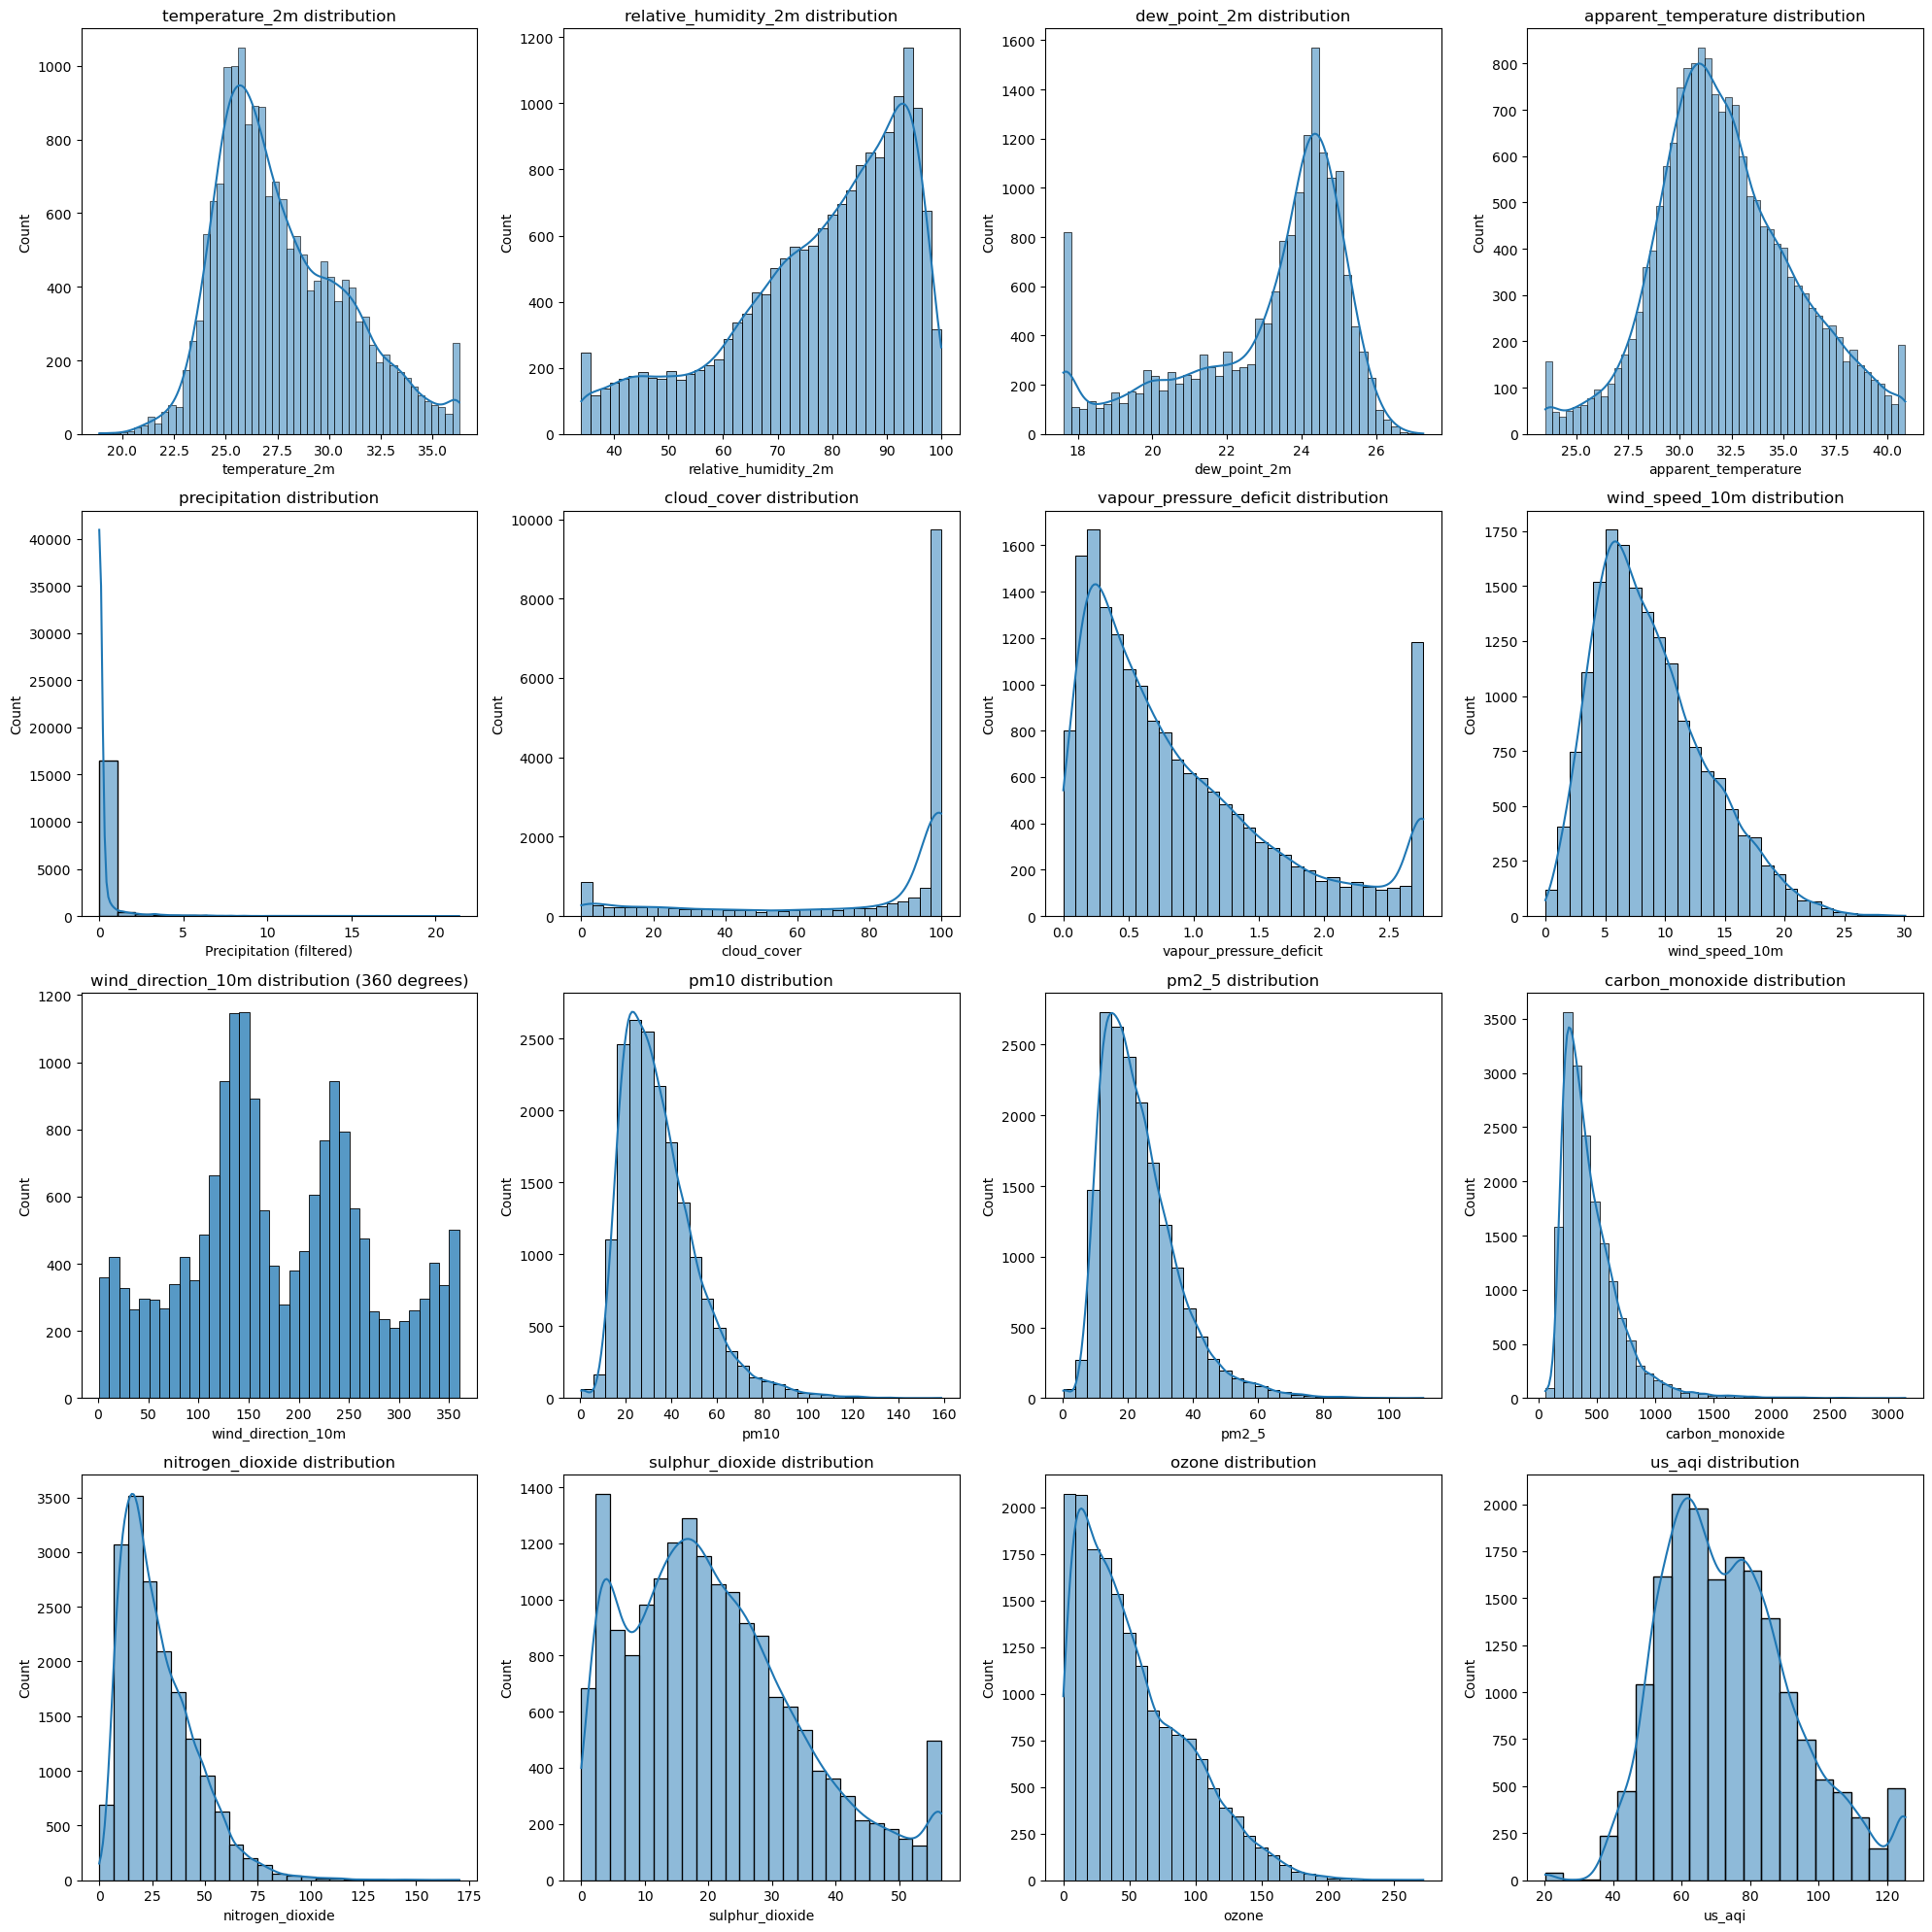

In [6]:
columns = df_cleaned.drop(["date_time", "weather_status"], axis=1).columns
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, feature in enumerate(columns):
    if feature in ['pm10', 'pm2_5']:
        # Fine particulate matter: Adjust bins and filter extreme values if needed
        sns.histplot(df_cleaned[feature], bins=30, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature == 'carbon_monoxide':
        # CO levels may need finer bins
        sns.histplot(df_cleaned[feature], bins=40, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature in ['nitrogen_dioxide', 'sulphur_dioxide']:
        # NO2 and SO2: Handle potential low ranges
        sns.histplot(df_cleaned[feature], bins=25, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature == 'ozone':
        # Ozone: Adjust bins and visualize the density
        sns.histplot(df_cleaned[feature], bins=30, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature == 'us_aqi':
        # US AQI: May benefit from clearer labeling of categories
        sns.histplot(df_cleaned[feature], bins=20, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature == 'precipitation':
        # Filter out zero values for precipitation
        sns.histplot(df_cleaned[feature], bins=20, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
        ax[i//4, i%4].set_xlabel("Precipitation (filtered)")
    elif feature in ['wind_speed_10m', 'vapour_pressure_deficit']:
        # Adjust bins for better resolution
        sns.histplot(df_cleaned[feature], bins=30, kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")
    elif feature == 'wind_direction_10m':
        # Wind direction may need circular data adjustment
        sns.histplot(df_cleaned[feature], bins=36, kde=False, ax=ax[i//4, i%4])  # 36 bins for 360 degrees
        ax[i//4, i%4].set_title(f"{feature} distribution (360 degrees)")
    else:
        # Default histogram for others
        sns.histplot(df_cleaned[feature], kde=True, ax=ax[i//4, i%4])
        ax[i//4, i%4].set_title(f"{feature} distribution")

    ax[i//4, i%4].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### Violin Plot

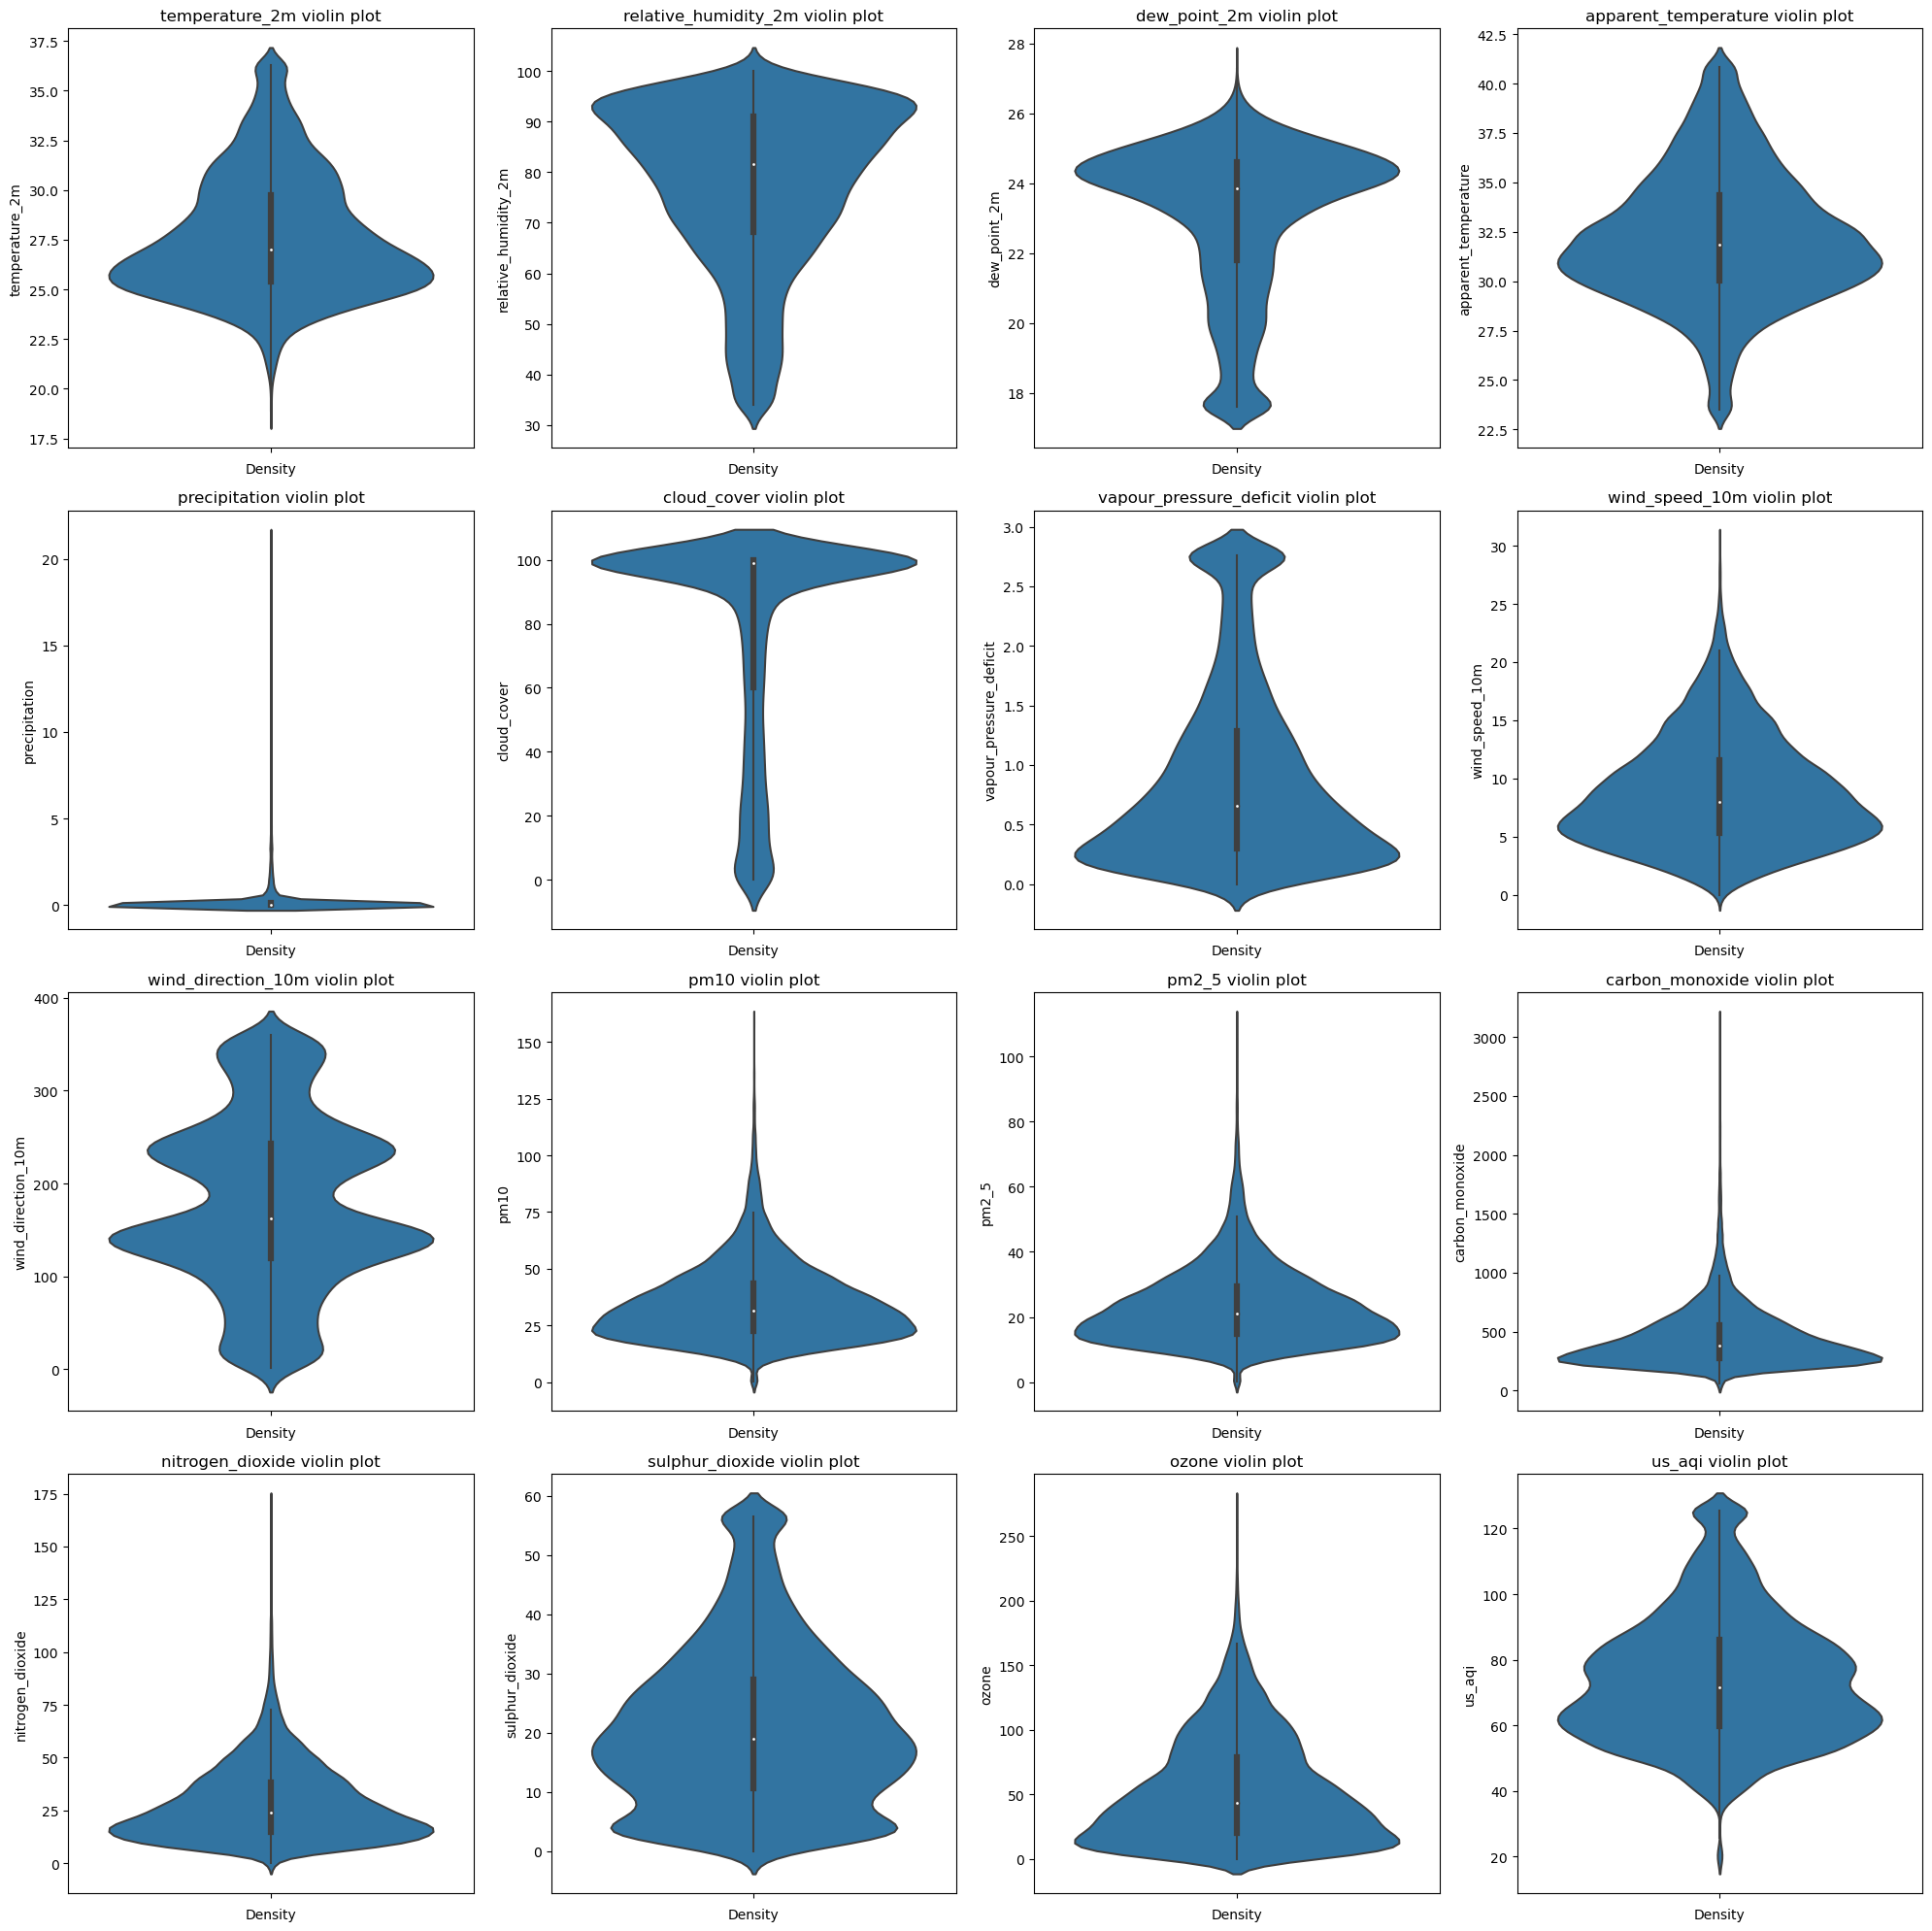

In [7]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, feature in enumerate(columns):
    sns.violinplot(y=df_cleaned[feature], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f"{feature} violin plot")
    ax[i//4, i%4].set_xlabel("Density")

plt.tight_layout()
plt.show()

#### Box Plot

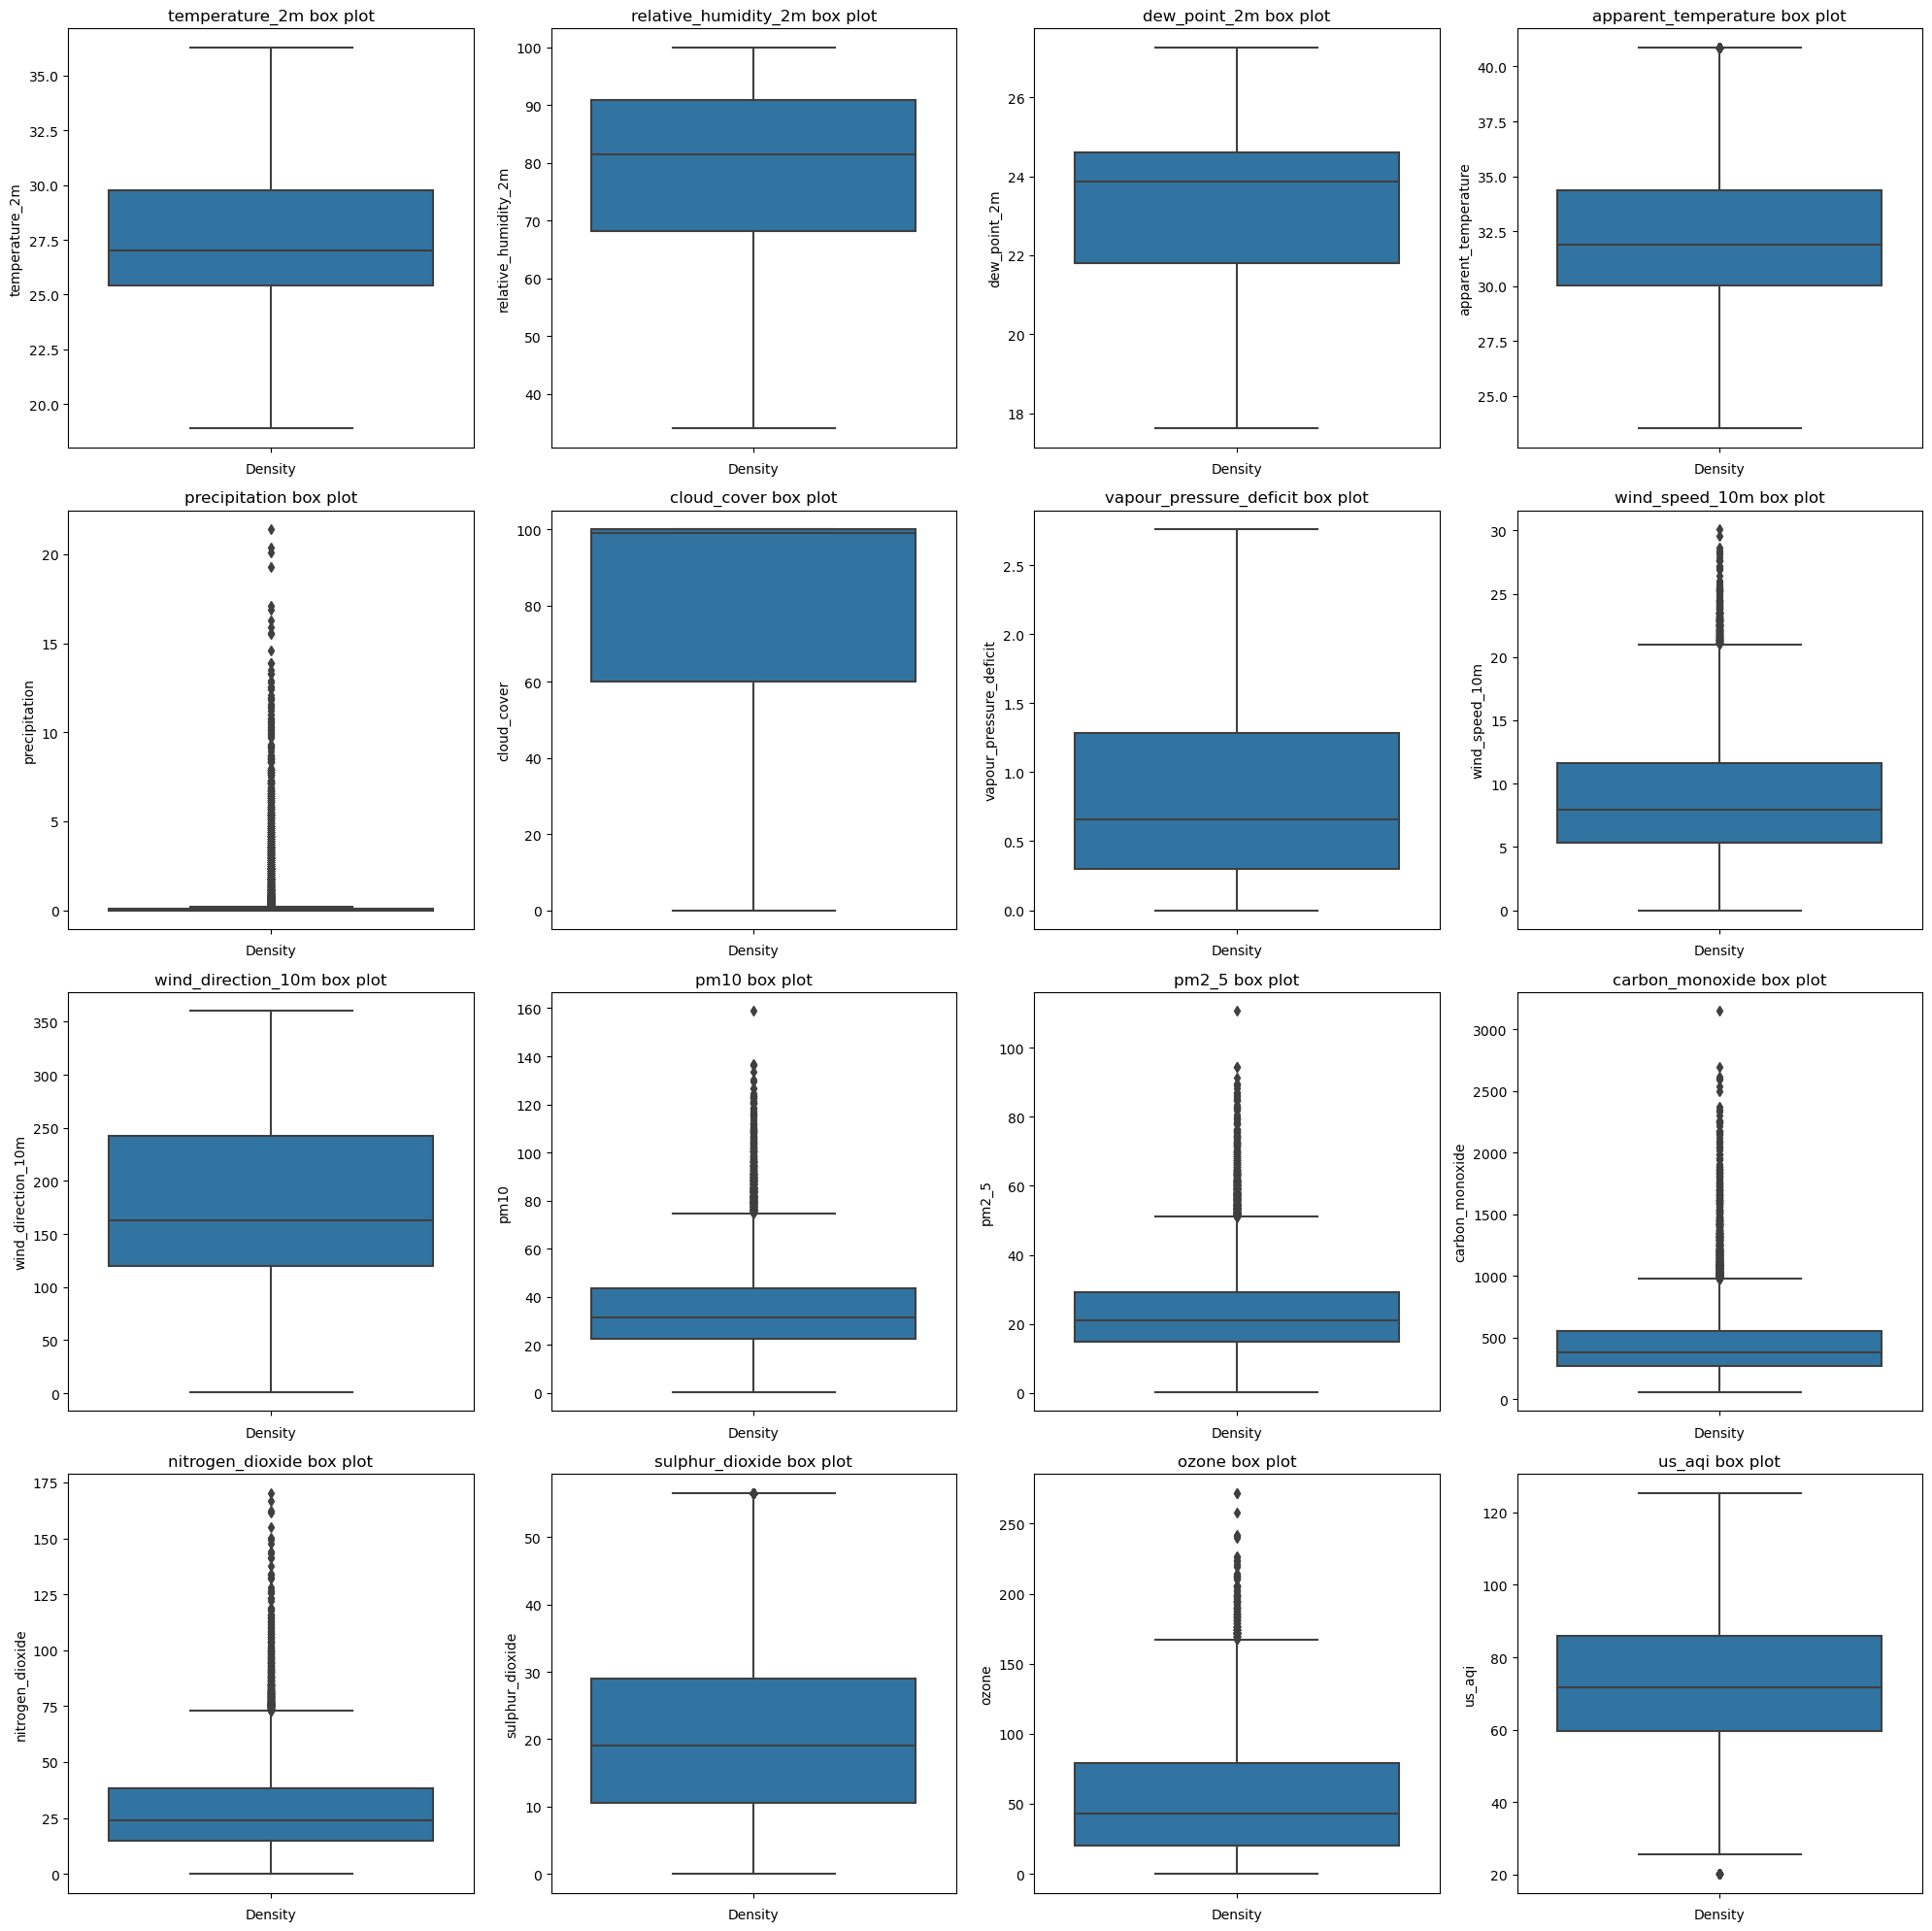

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, feature in enumerate(columns):
    sns.boxplot(y=df_cleaned[feature], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(f"{feature} box plot")
    ax[i//4, i%4].set_xlabel("Density")

plt.tight_layout()
plt.show()

#### Bar Plot

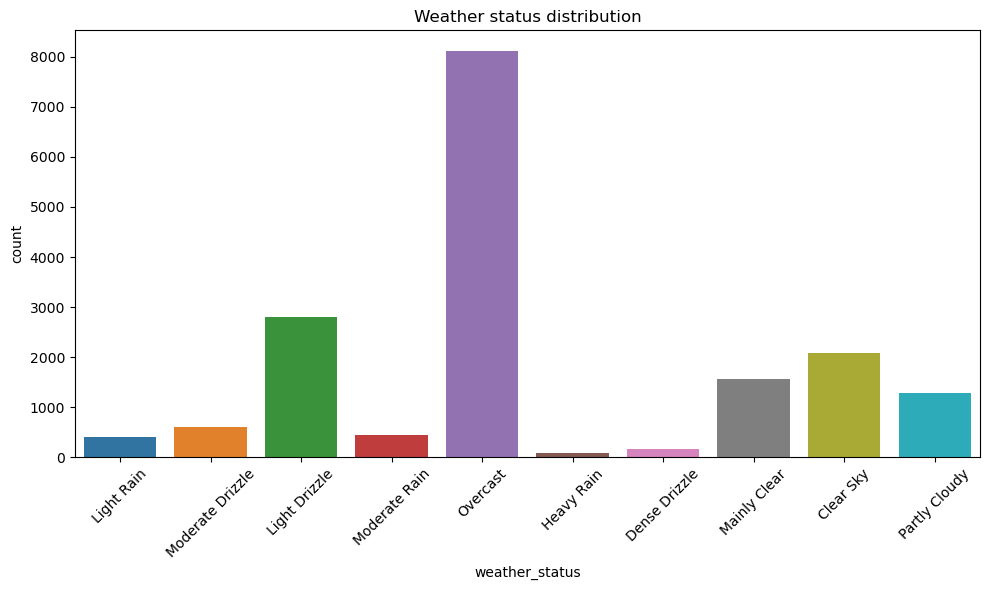

In [9]:
# Bar plot show the distribution of weather status
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='weather_status', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Weather status distribution')
plt.tight_layout()
plt.show()

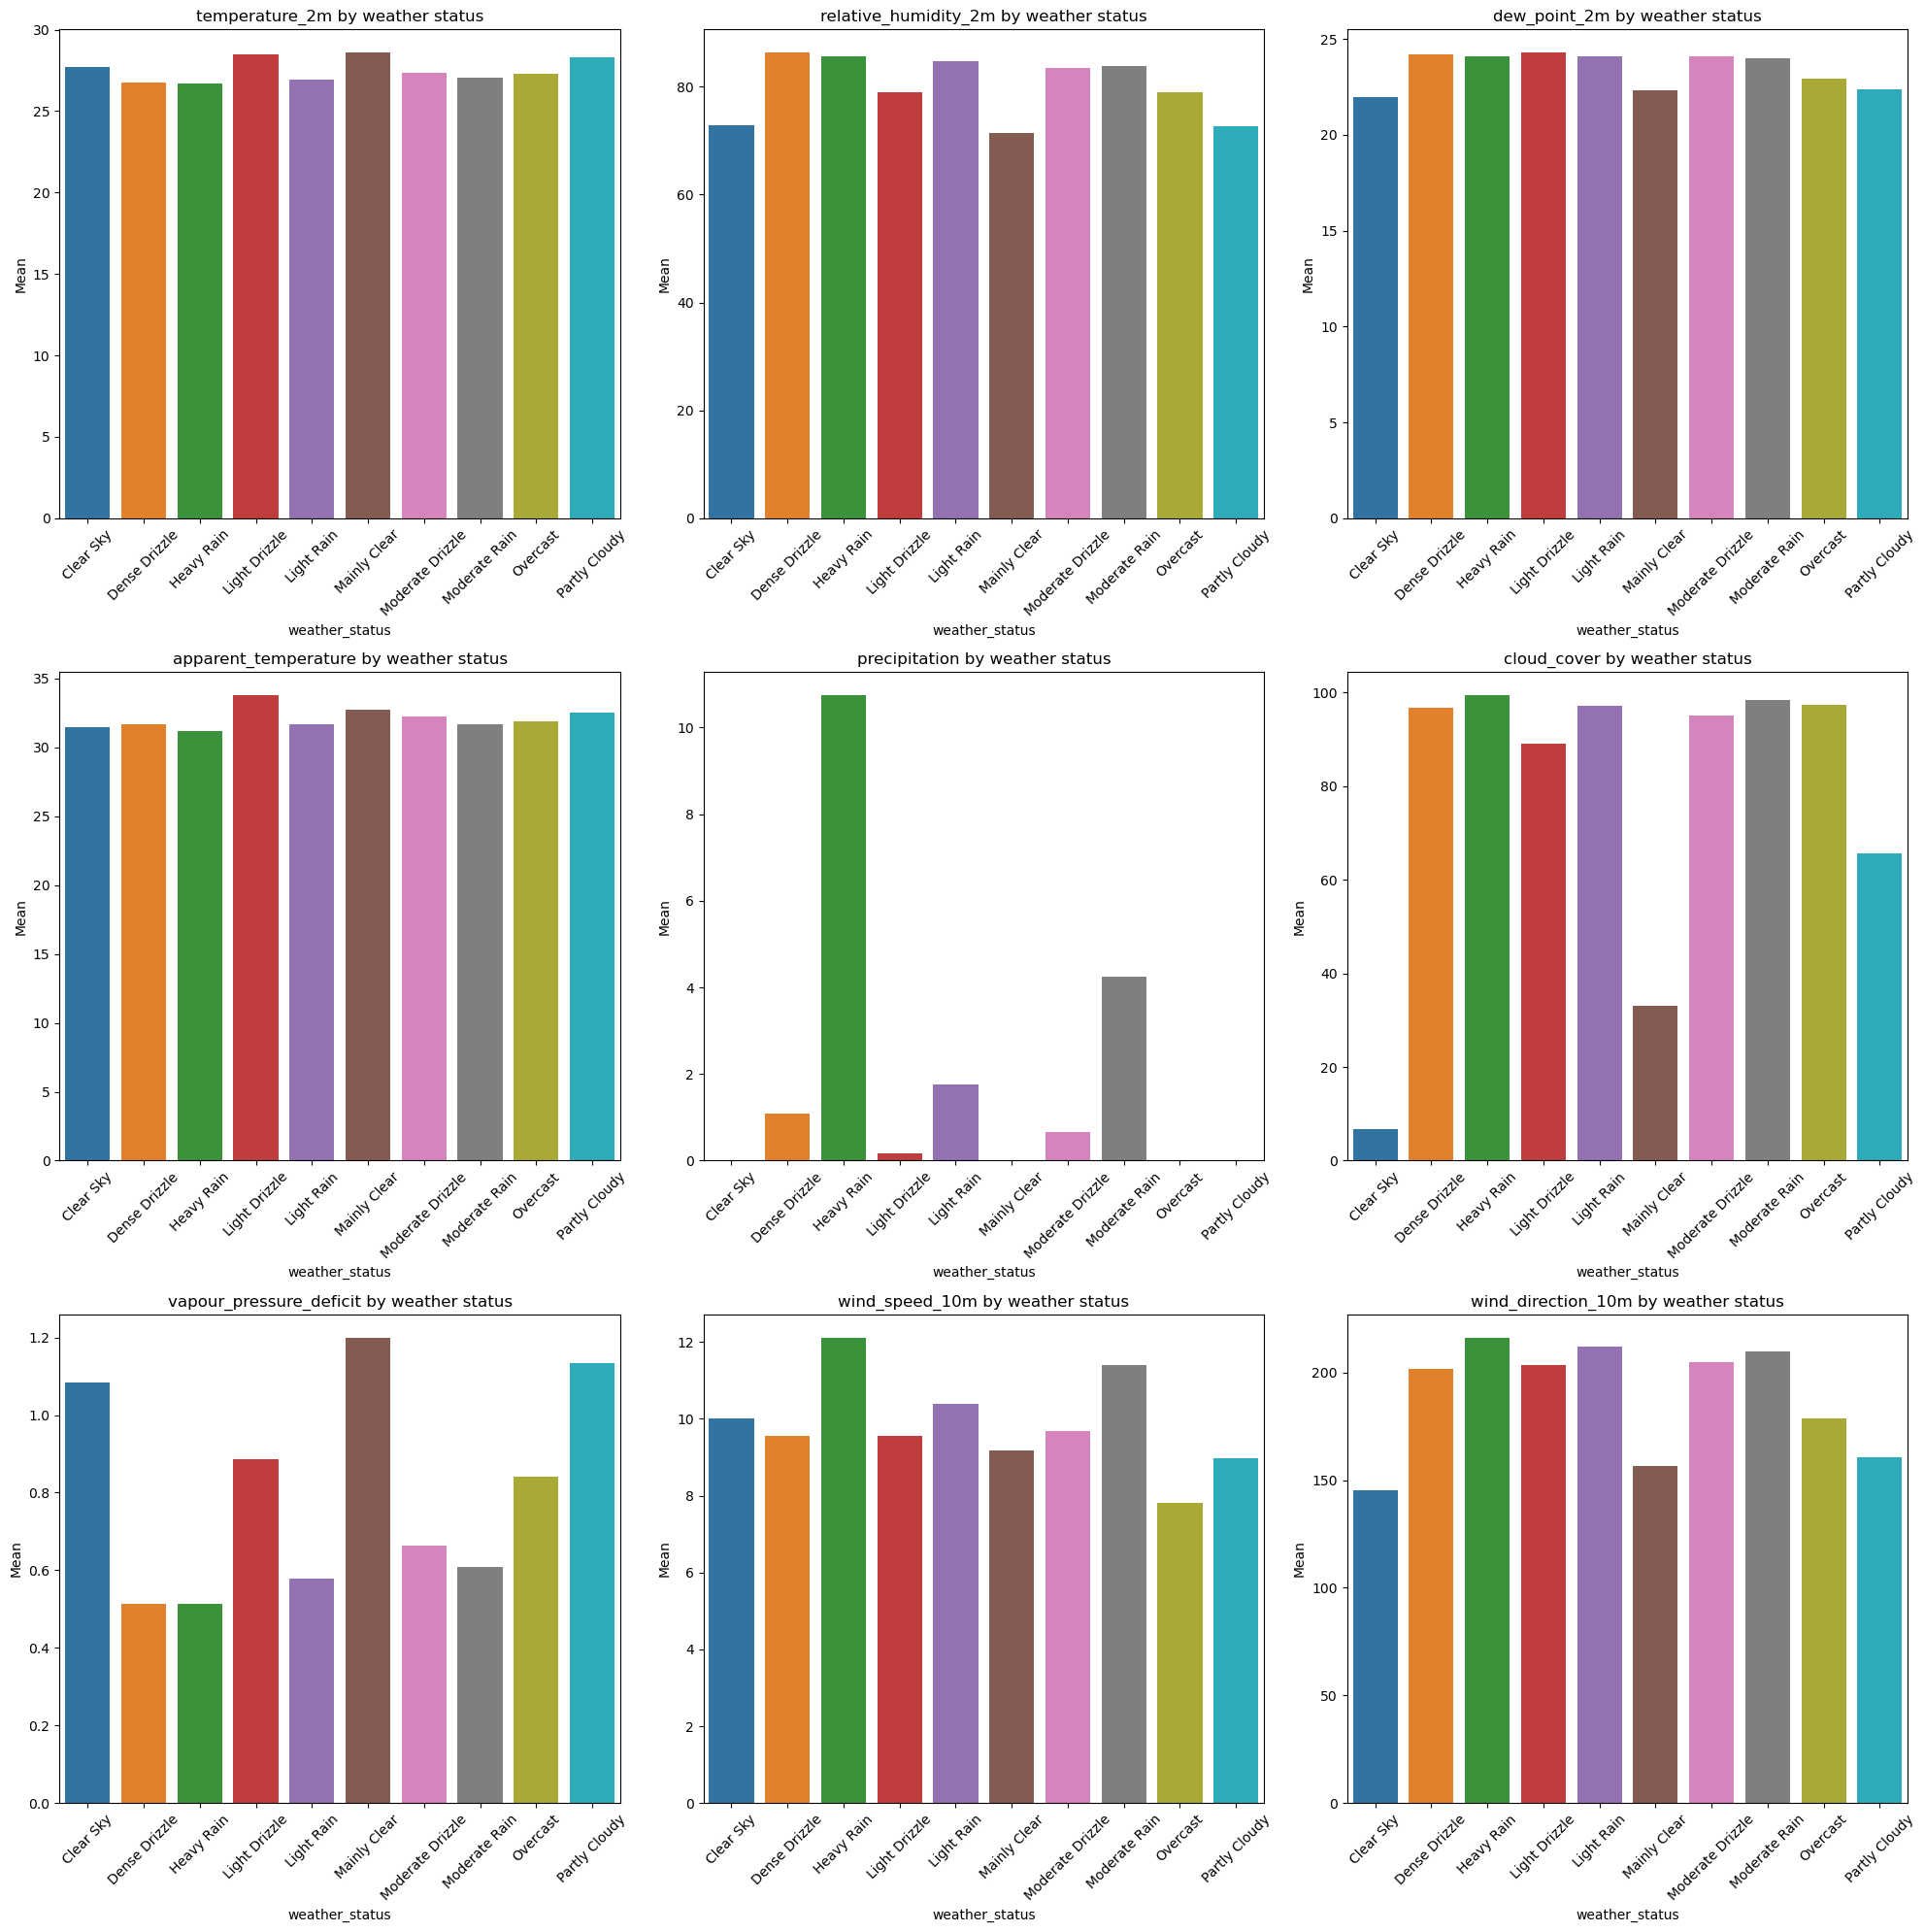

In [10]:
# Bar plot show the mean of each feature for weather metrics
weather_features = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 
                    'precipitation', 'cloud_cover', 'vapour_pressure_deficit', 'wind_speed_10m', 'wind_direction_10m']

mean_weather_metrics = df_cleaned.groupby('weather_status')[weather_features].mean()
mean_weather_metrics = mean_weather_metrics.reset_index()

# Plot 
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, feature in enumerate(weather_features):
    sns.barplot(data=mean_weather_metrics, x='weather_status', y=feature, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"{feature} by weather status")
    ax[i//3, i%3].set_ylabel("Mean")
    ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

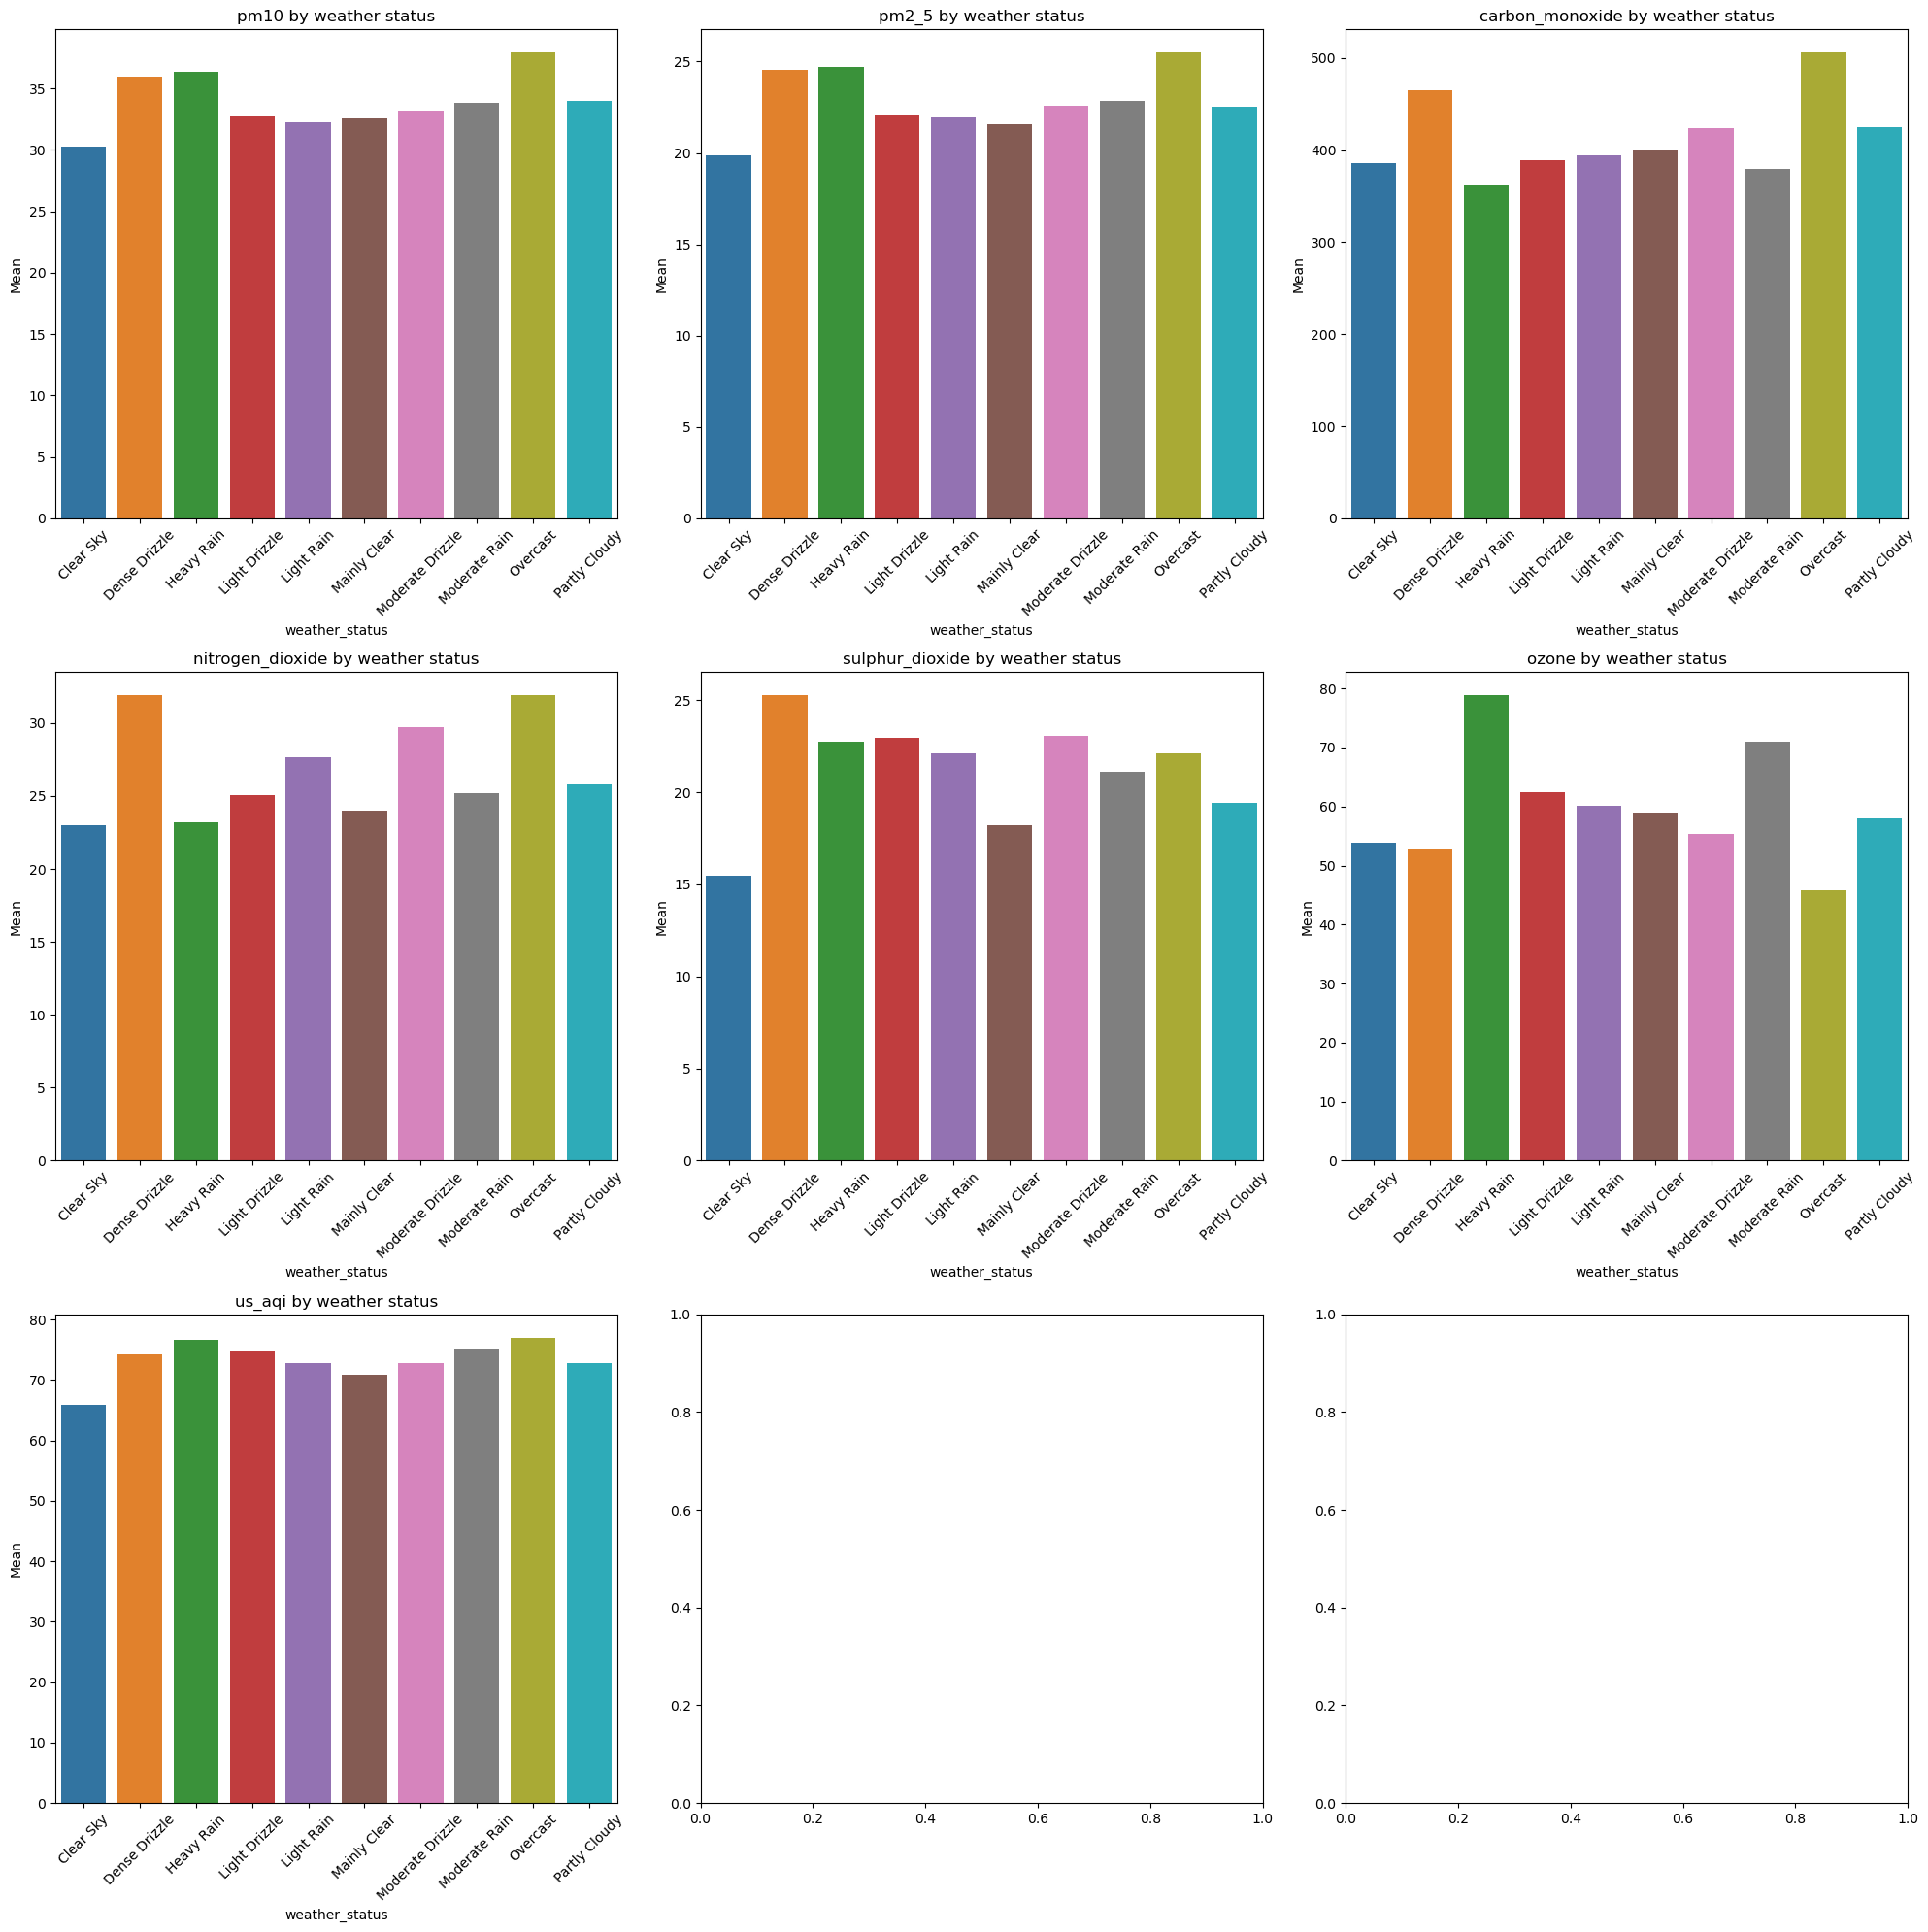

In [11]:
# Bar plot show the mean of each feature for AQ metrics
aq_features = ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'us_aqi']

mean_aq_metrics = df_cleaned.groupby('weather_status')[aq_features].mean()
mean_aq_metrics = mean_aq_metrics.reset_index()

# Plot
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, feature in enumerate(aq_features):
    sns.barplot(data=mean_aq_metrics, x='weather_status', y=feature, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"{feature} by weather status")
    ax[i//3, i%3].set_ylabel("Mean")
    ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

##### ***Comment:***
- The features exhibit uneven distributions. Some are left-skewed (e.g., `precipitation`, `vapour_pressure_deficit`, `wind_speed_10m`), while others approximate a normal distribution (e.g., `apparent_temperature`, `us_aqi`).
- Several features contain outliers. However, these outliers have already been addressed in the pre-processing phase, and their quantity is acceptable (i.e., they are unlikely to significantly affect the training of the model).
- Over the two years of observation, the majority of the recorded weather types fall under **Overcast**, with more than 8,000 entries. This is followed by **Light Drizzle** (~3,000 entries) and **Clear Sky** (~2,500 entries).
- Across different weather types:
    + Features like `temperature_2m`, `relative_humidity_2m`, `dew_point_2m`, `apparent_temperature`, `pm10`, `pm2_5`, and `us_aqi` show minimal variation. This suggests that these features may not be critical in classifying weather types in the subsequent weather classification model.
    + Conversely, the remaining features demonstrate significant changes across weather types. These features are likely to be important for distinguishing between different weather conditions in the upcoming classification model.

$\Rightarrow$ These insights will guide feature selection and modeling decisions, particularly in identifying the most relevant predictors for weather type classification.

### Bivariate Analysis and Correlation Heatmap


To effectively predict air quality and weather conditions in HCMC, understanding the relationships between various weather and air quality factors is essential. This analysis helps identify the key features that significantly impact environmental conditions and contribute most to accurate predictions of air quality and weather patterns.

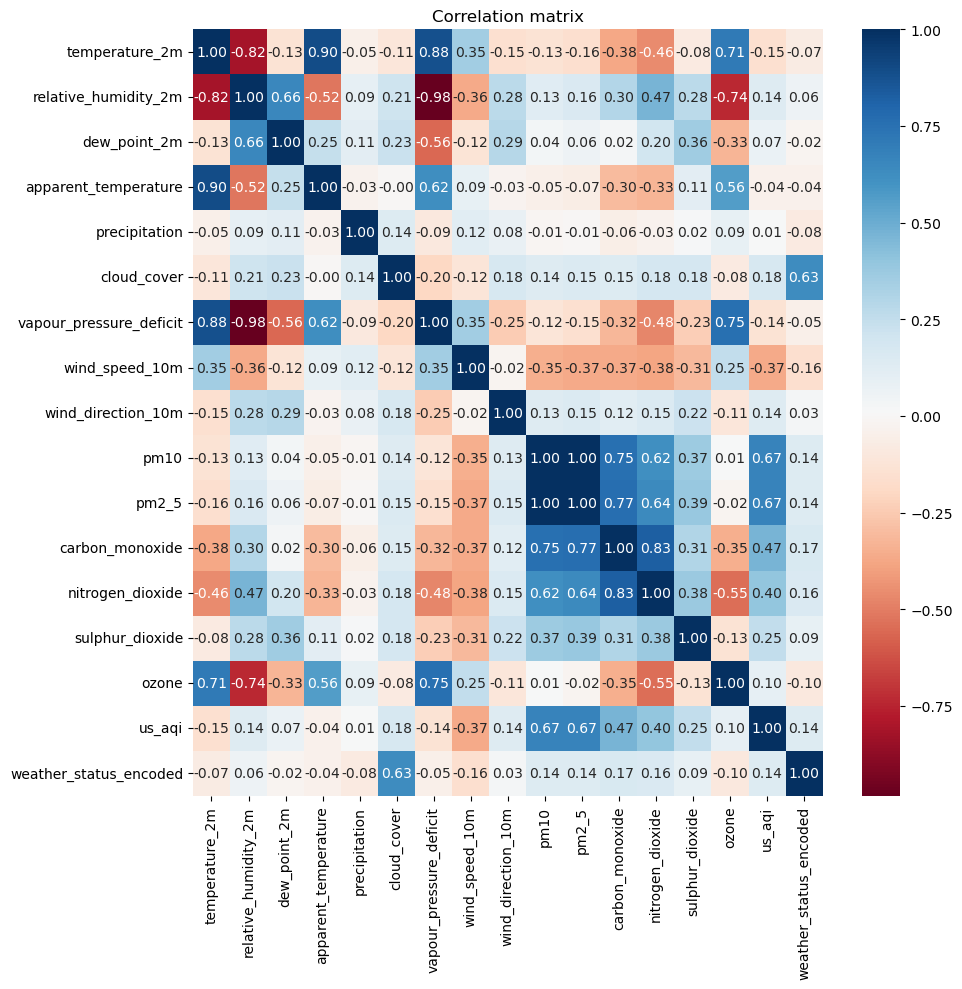

In [12]:
from sklearn.preprocessing import LabelEncoder

# encode weather status using LabelEncoder
df_corr = df_cleaned.copy()
df_corr['weather_status_encoded'] = LabelEncoder().fit_transform(df_cleaned['weather_status'])

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr.corr(), cmap='RdBu', annot=True, fmt=".2f", ax=ax)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

#### Scatter Plots
To visualize pairwise strong relationships (>0.7 or <-0.7>) between features.

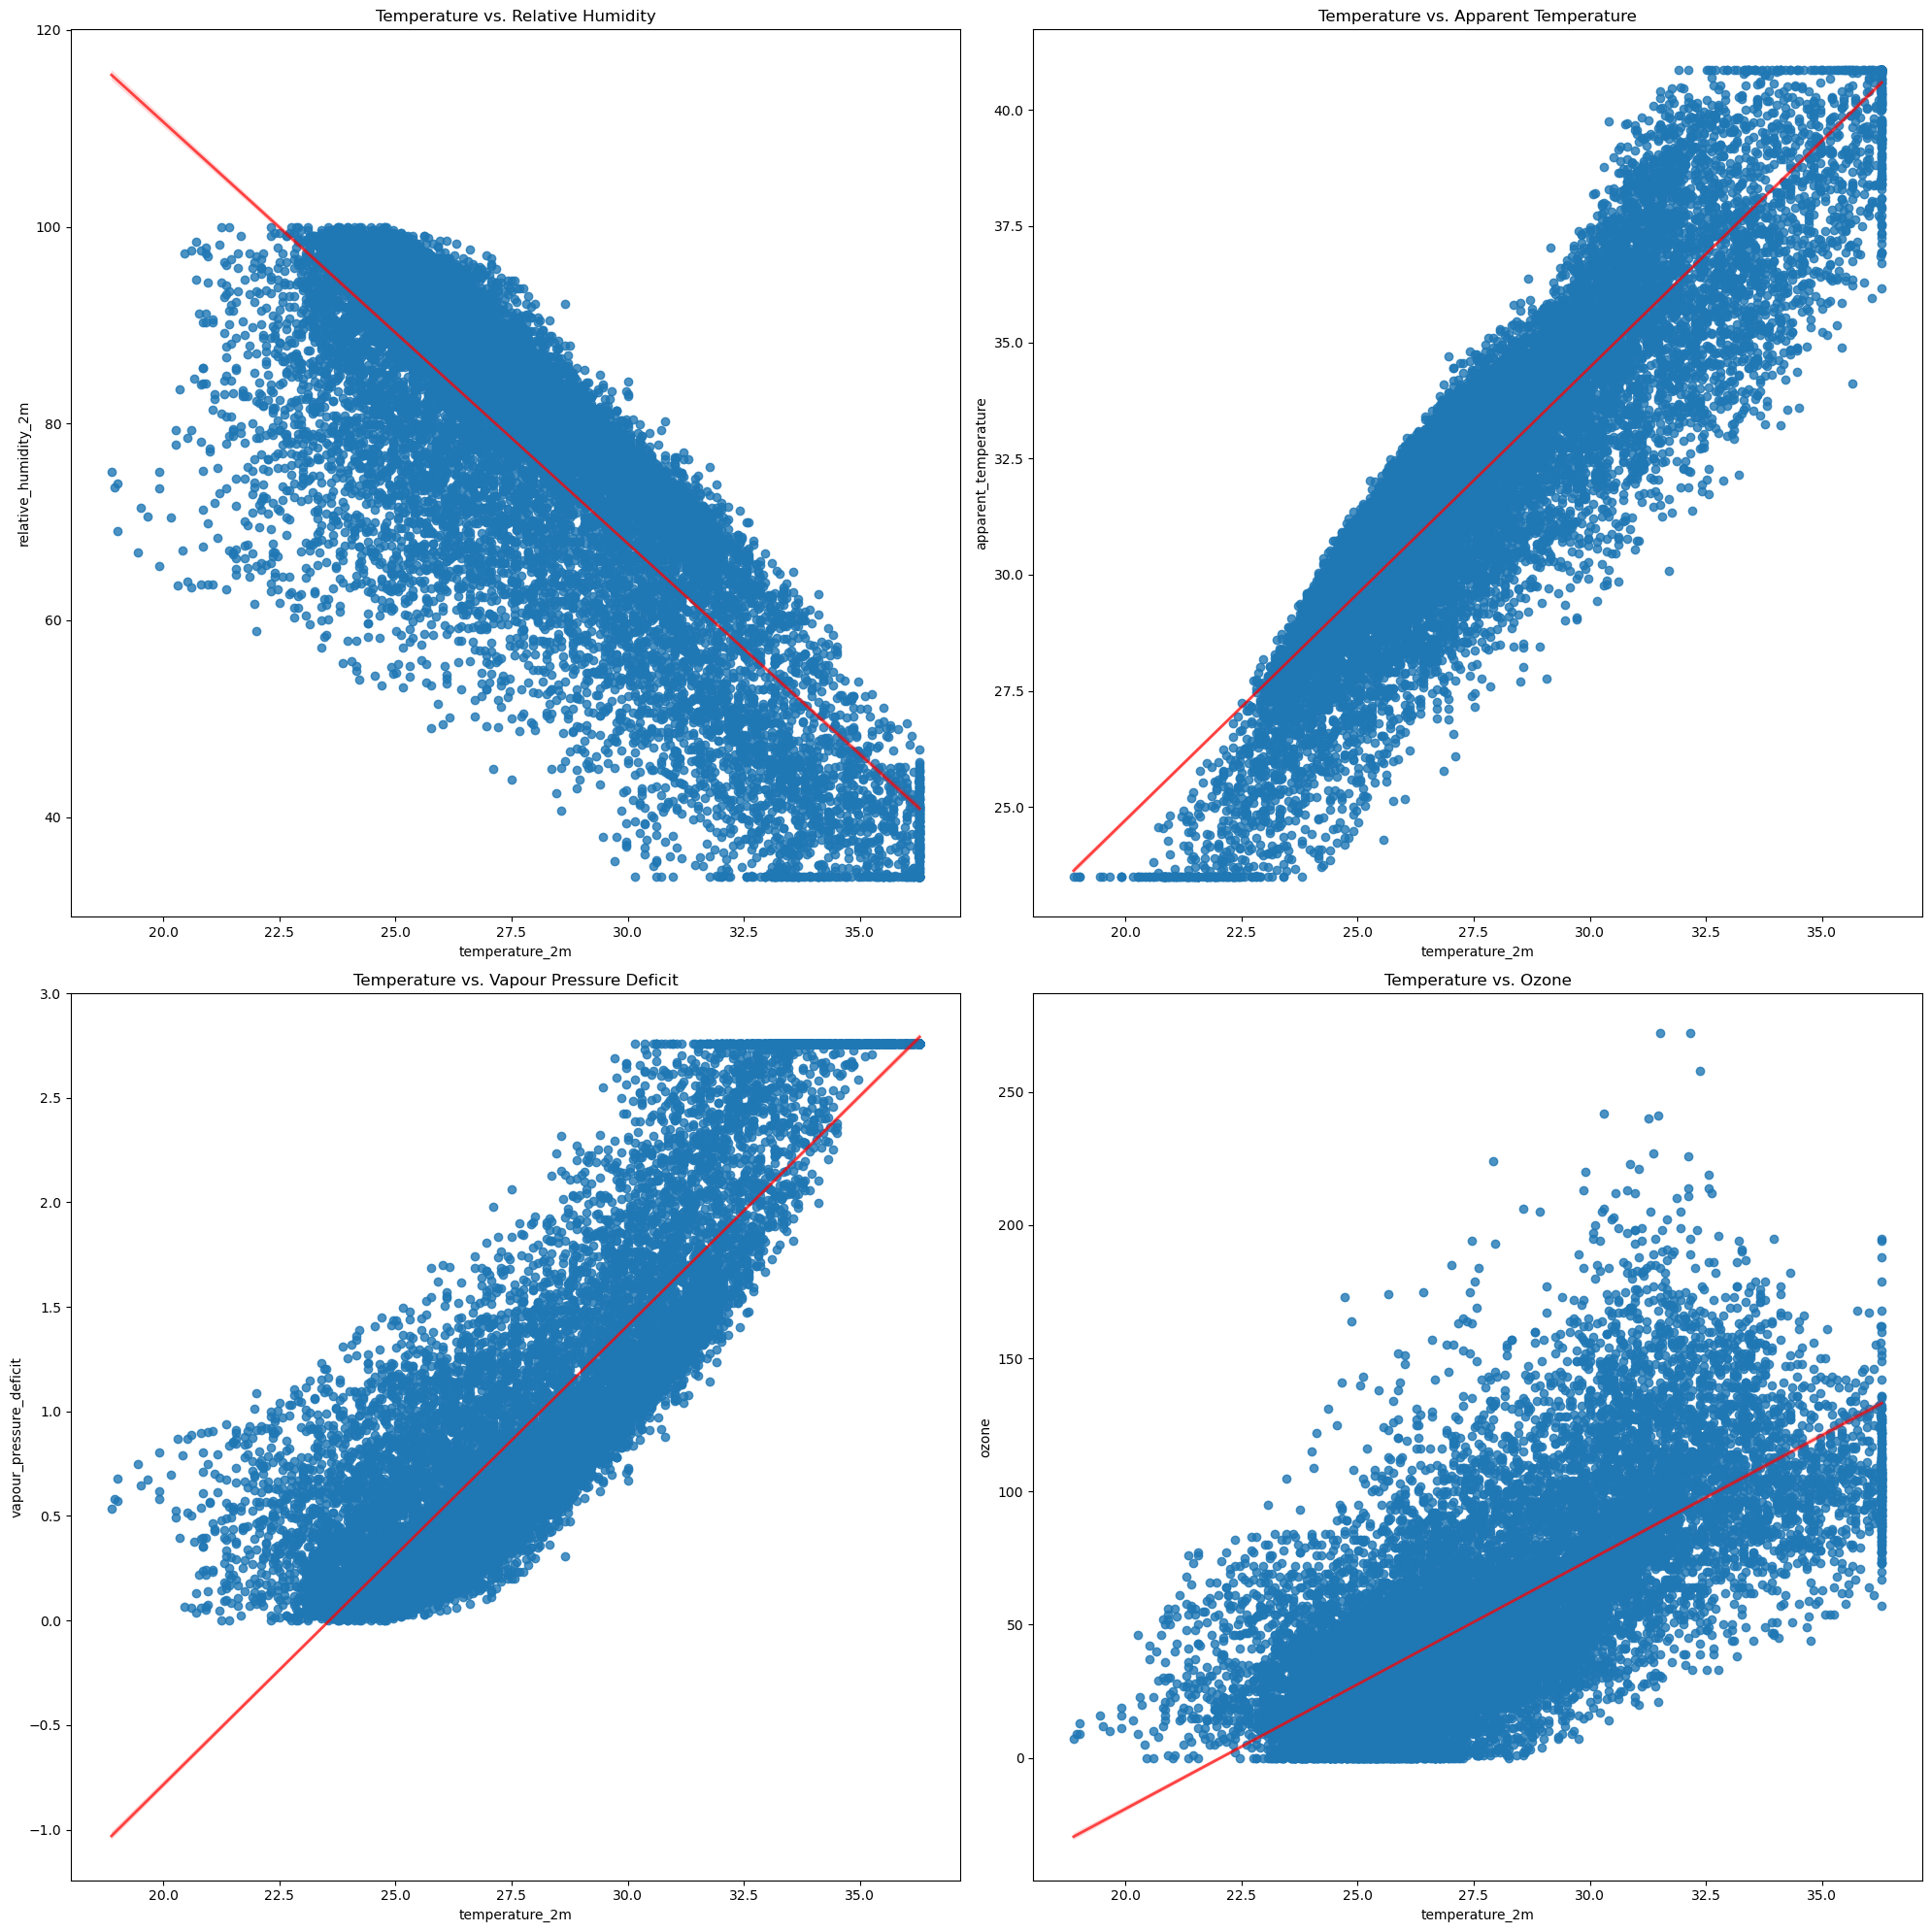

In [13]:
# temperature_2m vs. relative_humidity_2m, apparent_temperature, vapour_pressure_deficit, ozone
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.regplot(data=df_cleaned, x='temperature_2m', y='relative_humidity_2m', ax=ax[0, 0], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[0, 0].set_title('Temperature vs. Relative Humidity')
sns.regplot(data=df_cleaned, x='temperature_2m', y='apparent_temperature', ax=ax[0, 1], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[0, 1].set_title('Temperature vs. Apparent Temperature')
sns.regplot(data=df_cleaned, x='temperature_2m', y='vapour_pressure_deficit', ax=ax[1, 0], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[1, 0].set_title('Temperature vs. Vapour Pressure Deficit')
sns.regplot(data=df_cleaned, x='temperature_2m', y='ozone', ax=ax[1, 1], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[1, 1].set_title('Temperature vs. Ozone')

plt.tight_layout()
plt.show()

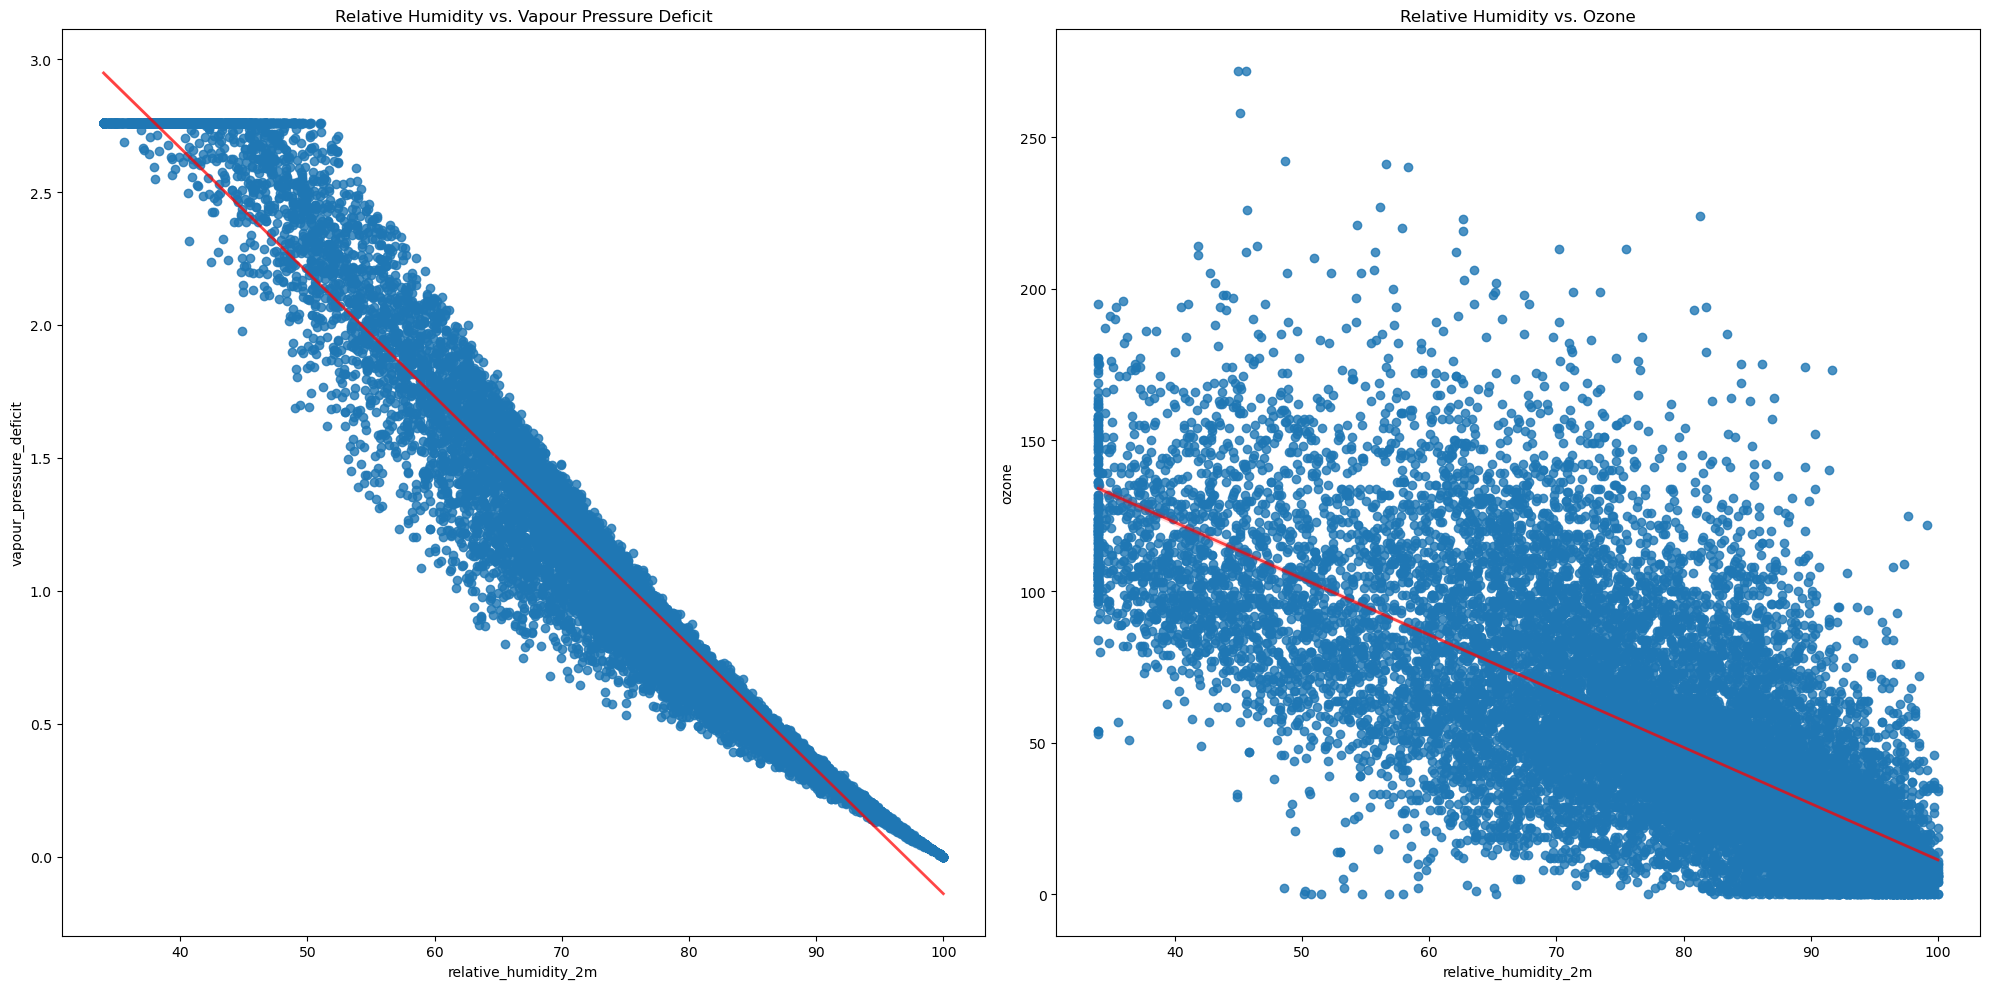

In [14]:
# relative_humidity_2m vs. vapour_pressure_deficit, ozone
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.regplot(data=df_cleaned, x='relative_humidity_2m', y='vapour_pressure_deficit', ax=ax[0], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[0].set_title('Relative Humidity vs. Vapour Pressure Deficit')
sns.regplot(data=df_cleaned, x='relative_humidity_2m', y='ozone', ax=ax[1], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[1].set_title('Relative Humidity vs. Ozone')

plt.tight_layout()
plt.show()

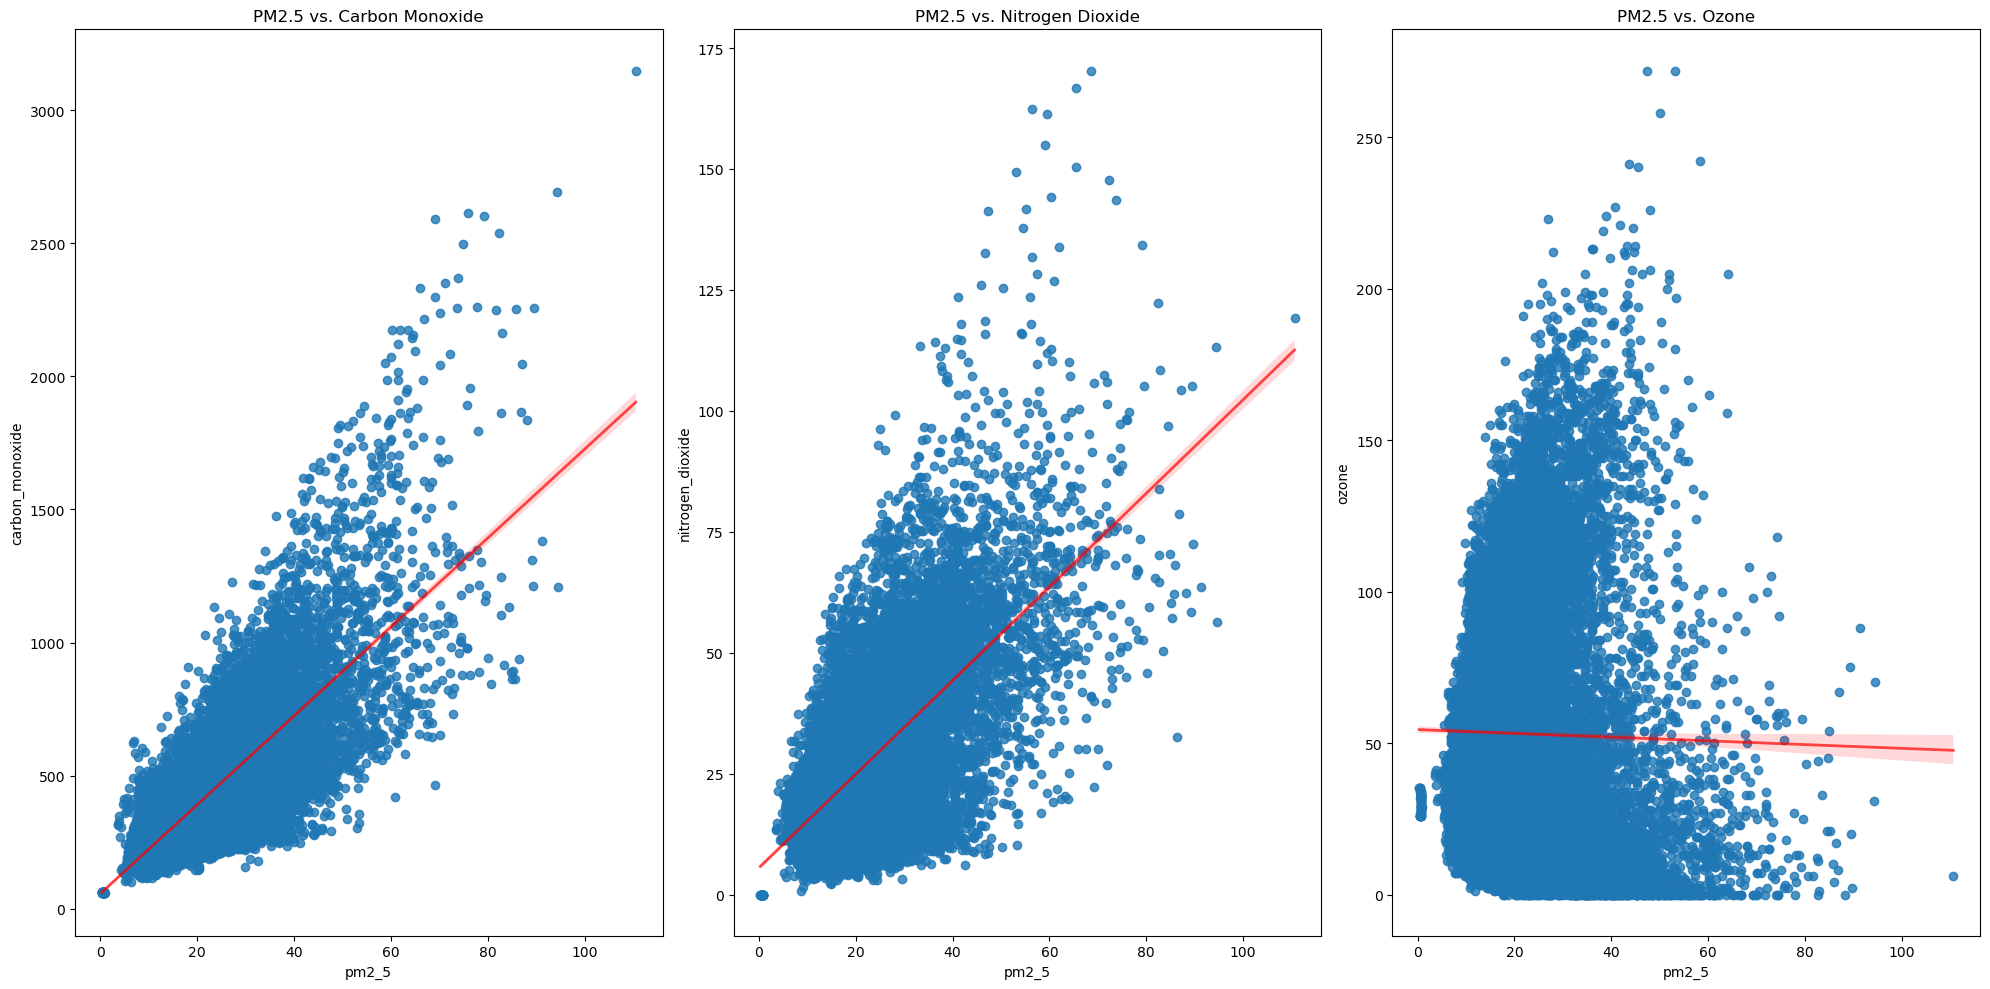

In [15]:
# pm2.5 vs. carbon_monoxide, nitrogen_dioxide, ozone
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.regplot(data=df_cleaned, x='pm2_5', y='carbon_monoxide', ax=ax[0], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[0].set_title('PM2.5 vs. Carbon Monoxide')
sns.regplot(data=df_cleaned, x='pm2_5', y='nitrogen_dioxide', ax=ax[1], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[1].set_title('PM2.5 vs. Nitrogen Dioxide')
sns.regplot(data=df_cleaned, x='pm2_5', y='ozone', ax=ax[2], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[2].set_title('PM2.5 vs. Ozone')

plt.tight_layout()
plt.show()

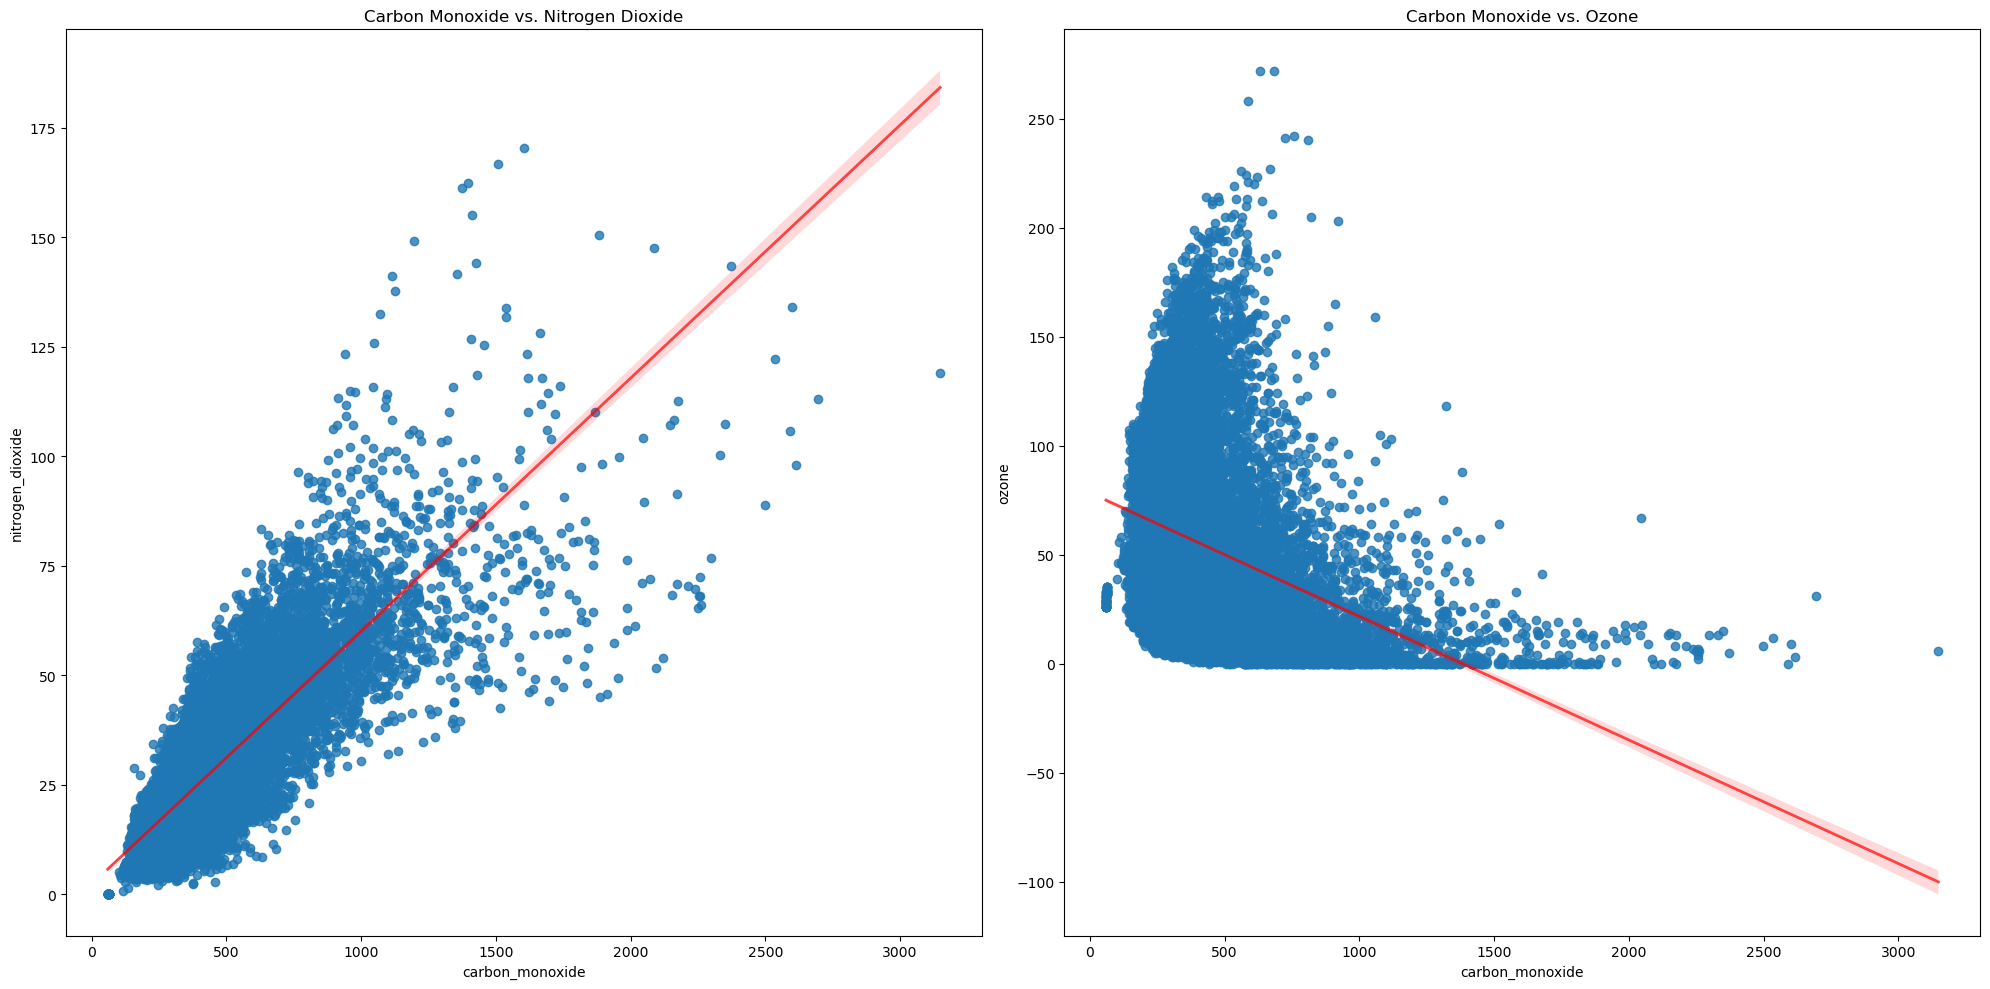

In [16]:
# carbon_monoxide vs. nitrogen_dioxide, ozone
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.regplot(data=df_cleaned, x='carbon_monoxide', y='nitrogen_dioxide', ax=ax[0], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[0].set_title('Carbon Monoxide vs. Nitrogen Dioxide')
sns.regplot(data=df_cleaned, x='carbon_monoxide', y='ozone', ax=ax[1], line_kws={"color":"r","alpha":0.7,"lw":2})
ax[1].set_title('Carbon Monoxide vs. Ozone')

plt.tight_layout()
plt.show()

#### Line Plot
To analyze how air quality features change over time.

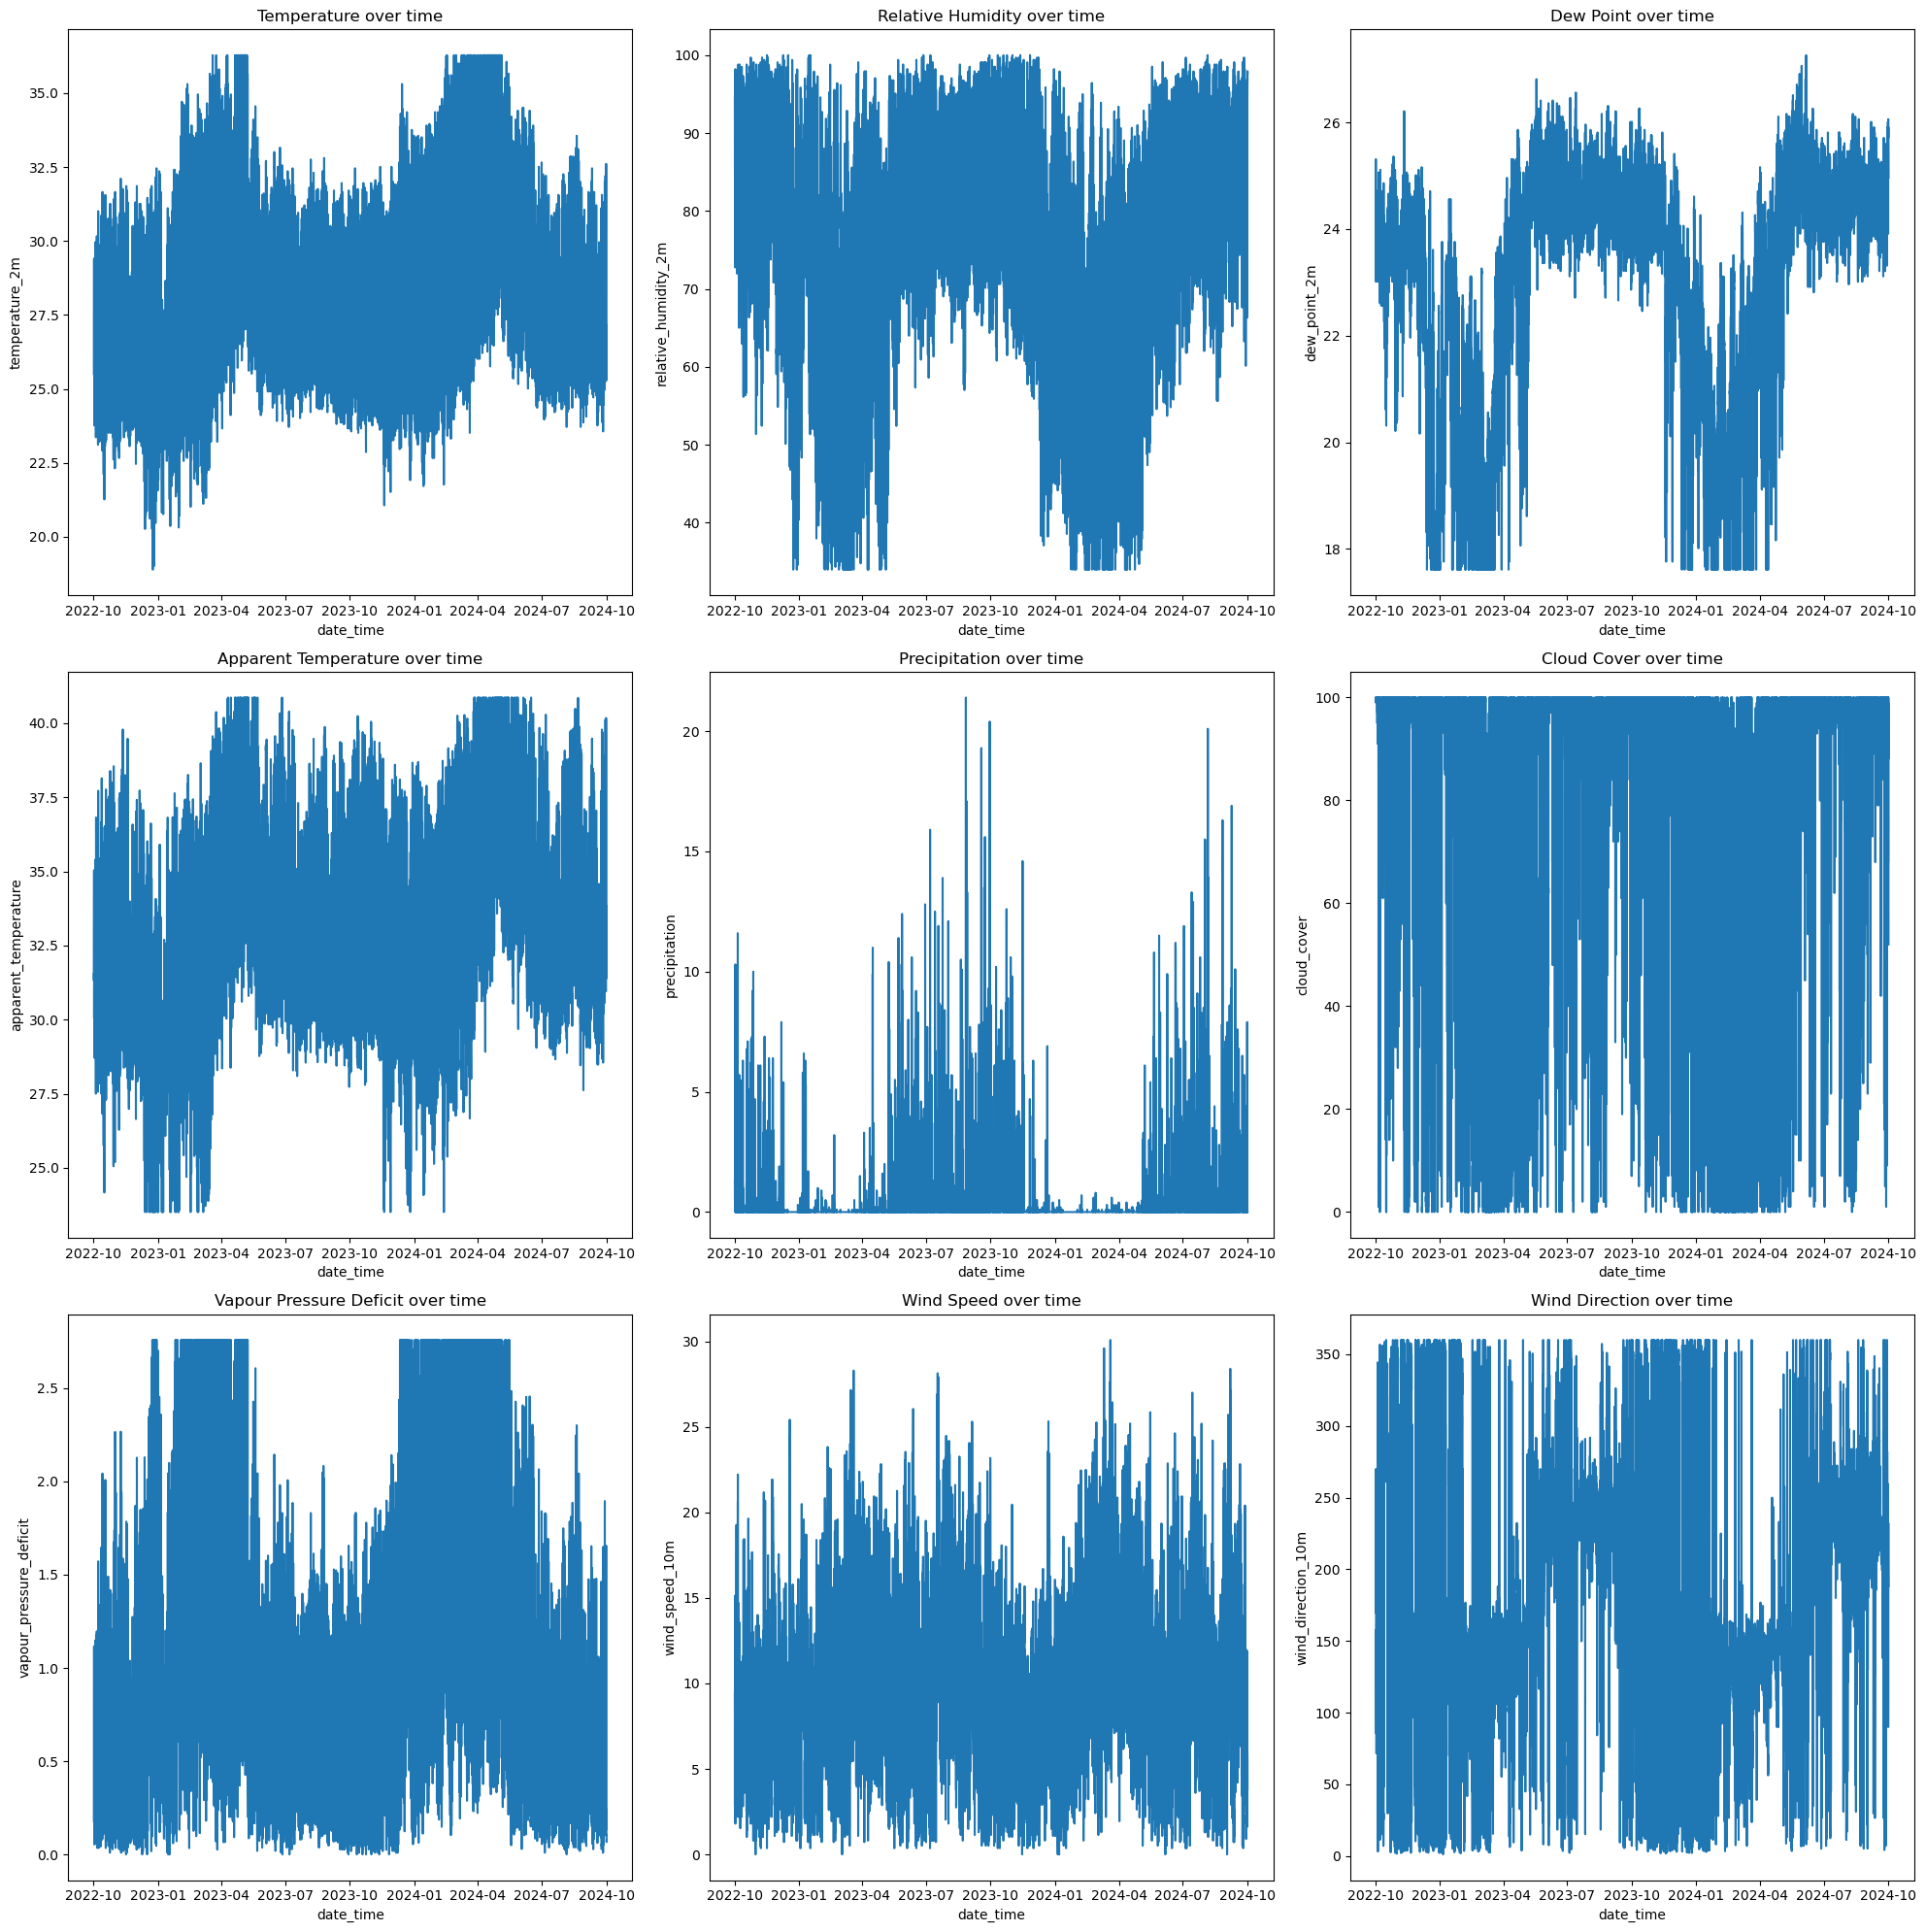

In [17]:
# weather over time
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.lineplot(data=df_cleaned, x='date_time', y='temperature_2m', ax=ax[0, 0])  
ax[0, 0].set_title('Temperature over time')
sns.lineplot(data=df_cleaned, x='date_time', y='relative_humidity_2m', ax=ax[0, 1])
ax[0, 1].set_title('Relative Humidity over time')
sns.lineplot(data=df_cleaned, x='date_time', y='dew_point_2m', ax=ax[0, 2])
ax[0, 2].set_title('Dew Point over time')
sns.lineplot(data=df_cleaned, x='date_time', y='apparent_temperature', ax=ax[1, 0])
ax[1, 0].set_title('Apparent Temperature over time')
sns.lineplot(data=df_cleaned, x='date_time', y='precipitation', ax=ax[1, 1])
ax[1, 1].set_title('Precipitation over time')
sns.lineplot(data=df_cleaned, x='date_time', y='cloud_cover', ax=ax[1, 2])
ax[1, 2].set_title('Cloud Cover over time')
sns.lineplot(data=df_cleaned, x='date_time', y='vapour_pressure_deficit', ax=ax[2, 0])
ax[2, 0].set_title('Vapour Pressure Deficit over time')
sns.lineplot(data=df_cleaned, x='date_time', y='wind_speed_10m', ax=ax[2, 1])
ax[2, 1].set_title('Wind Speed over time')
sns.lineplot(data=df_cleaned, x='date_time', y='wind_direction_10m', ax=ax[2, 2])
ax[2, 2].set_title('Wind Direction over time')

plt.tight_layout()
plt.show()

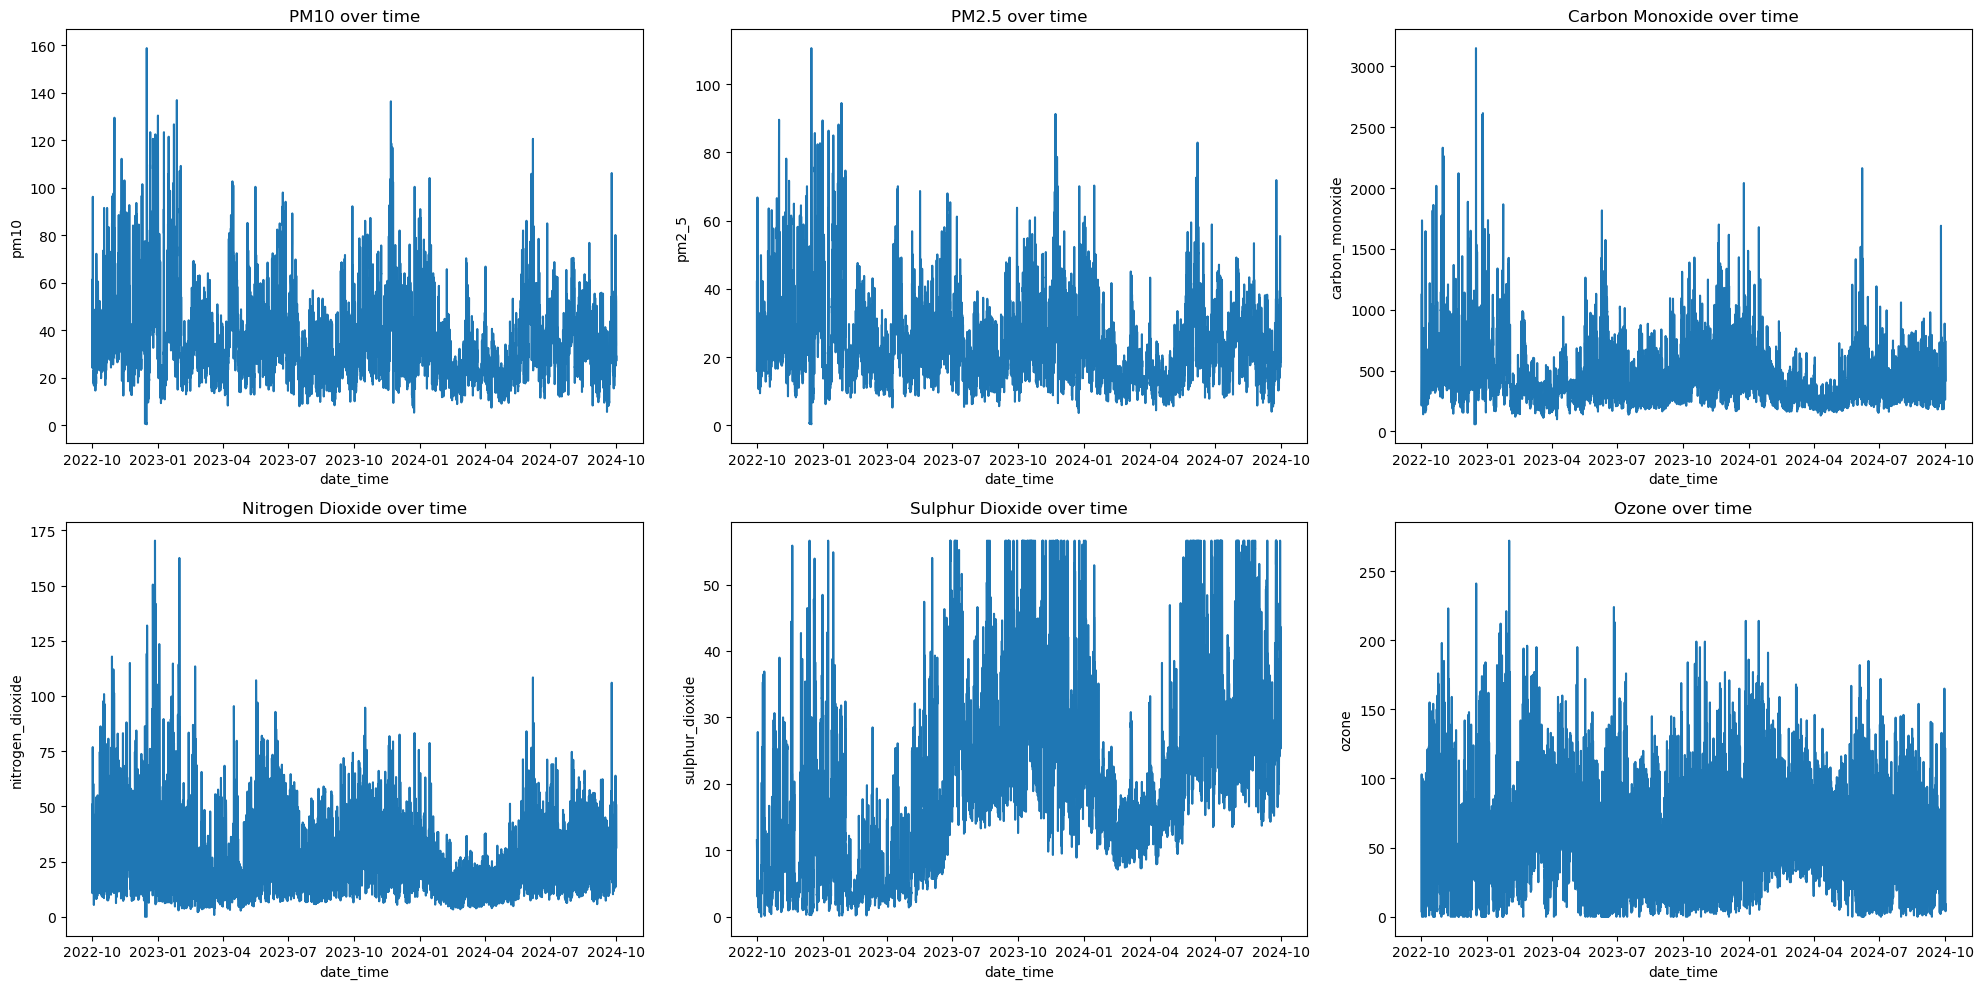

In [18]:
# air quality over time
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.lineplot(data=df_cleaned, x='date_time', y='pm10', ax=ax[0, 0])
ax[0, 0].set_title('PM10 over time')
sns.lineplot(data=df_cleaned, x='date_time', y='pm2_5', ax=ax[0, 1])
ax[0, 1].set_title('PM2.5 over time')
sns.lineplot(data=df_cleaned, x='date_time', y='carbon_monoxide', ax=ax[0, 2])
ax[0, 2].set_title('Carbon Monoxide over time')
sns.lineplot(data=df_cleaned, x='date_time', y='nitrogen_dioxide', ax=ax[1, 0])
ax[1, 0].set_title('Nitrogen Dioxide over time')
sns.lineplot(data=df_cleaned, x='date_time', y='sulphur_dioxide', ax=ax[1, 1])
ax[1, 1].set_title('Sulphur Dioxide over time')
sns.lineplot(data=df_cleaned, x='date_time', y='ozone', ax=ax[1, 2])
ax[1, 2].set_title('Ozone over time')

plt.tight_layout()
plt.show()

#### Cross-tabulation and Bar Plots
To examine the relationship between categorical variables.

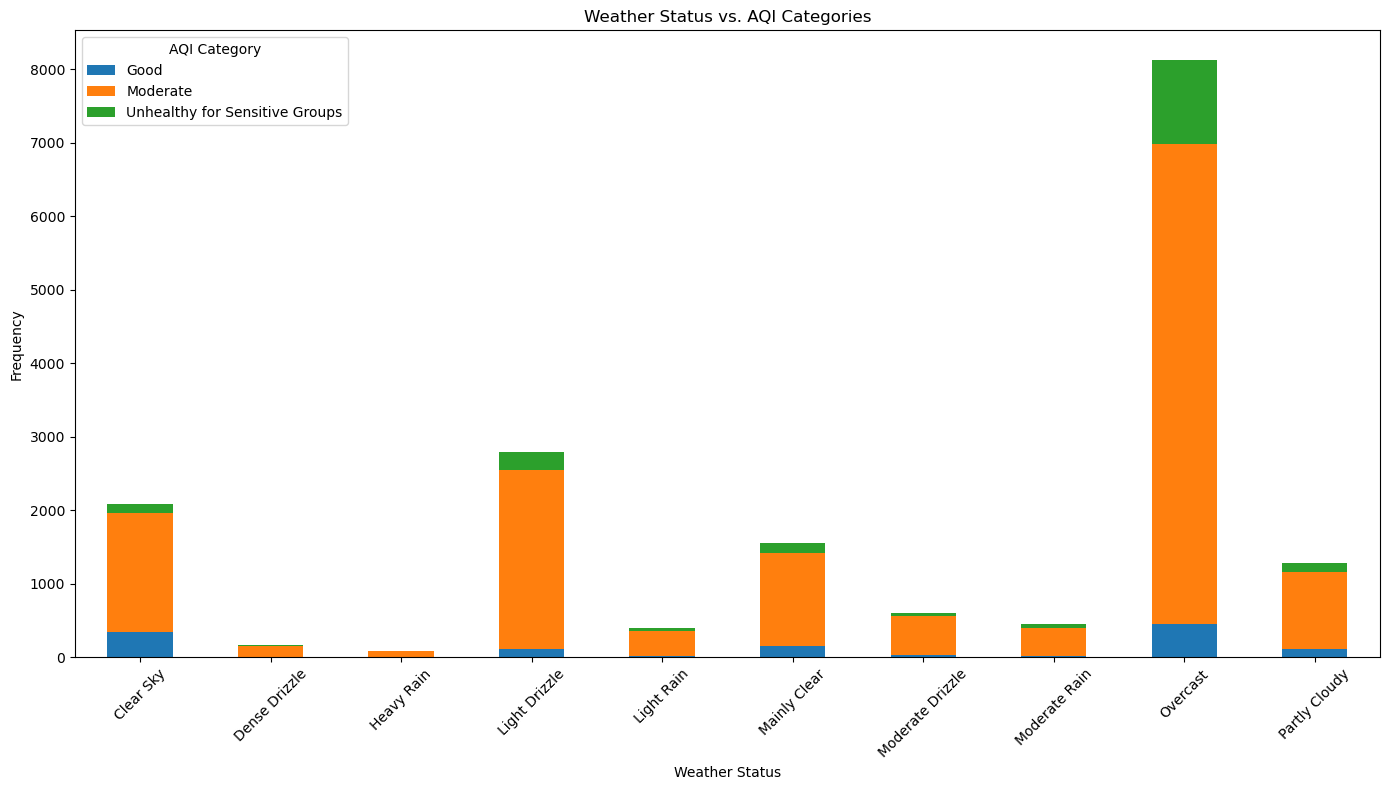

In [19]:
# Define AQI categories based on standard ranges
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply the categorization to the us_aqi column
df_cleaned['aqi_category'] = df_cleaned['us_aqi'].apply(categorize_aqi)

# Cross-tabulate weather_status with AQI categories
cross_tab = pd.crosstab(df_cleaned['weather_status'], df_cleaned['aqi_category'])

# Plot the cross-tabulation as bar plots
cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Weather Status vs. AQI Categories')
plt.xlabel('Weather Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='AQI Category')
plt.tight_layout()
plt.show()

##### ***Comment:***
* We can see the **strongest correlations**:
    * ***Possitive correlation between PM10 and PM2.5***: This suggests that these pollutants often come from similar sources or are influenced by similar environmental conditions.
    * ***Negative correlation between Relative Humidity and Vapour pressure deficit***: Higher humidity means the air is closer to saturation, resulting in a lower VPD. This relationship is essential in understanding moisture levels in the air, which impacts weather patterns and air quality condition.
* Between **Weather and Air Quality**, there're some important correlations:
    * ***Positive correltion between Ozone and Temperature***: As temperature rises, ozone levels tend to increase. This is likely due to warmer temperatures accelerating chemical reactions that produce ozone, especially in urban areas with pollutants, impacting air quality on hot days.
    * ***Negative correlation between Ozone and Relative Humidity***: Higher humidity conditions may hinder ozone formation or persistence, a pattern observed in some urban atmospheres.

$\Rightarrow$ There're connections between weather and air quality factors in HCMC. Pollutants like PM10 and PM2.5 tend to increase together, suggesting common sources or environmental influences. Humidity and vapour pressure deficit are inversely related, showing how moisture levels impact air conditions. Temperature and humidity also influence ozone levels, with warmer temperatures increasing ozone and higher humidity potentially reducing it. These insights emphasize the complex interactions between weather and air quality, which are crucial for effective monitoring and management of urban air conditions.

## Key Insight

- Weather and air quality are closely intertwined in Ho Chi Minh City. Factors like humidity, temperature, and pollutants such as PM2.5 and ozone exhibit strong relationships, highlighting the complex interactions between environmental conditions and air quality.
- These findings are crucial for guiding feature selection and model development in subsequent tasks like weather classification and air quality prediction.